In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

%load_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm as tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
# import importlib
from IPython.display import display, HTML
import pandas as pd
import pickle

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb
# %matplotlib notebook

from sympy.parsing import mathematica
import sympy
from sympy.printing.latex import LatexPrinter, print_latex
from sympy.utilities.lambdify import lambdify, lambdastr
import inspect

%matplotlib inline
rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

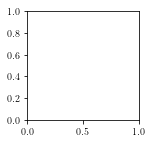

In [2]:
fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)


init \theta=0.000, \phi=1.714, \psi=0.000, 
last \theta=1.623, \phi=3.141, \psi=1.146, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 61.389853s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 61.4s


True

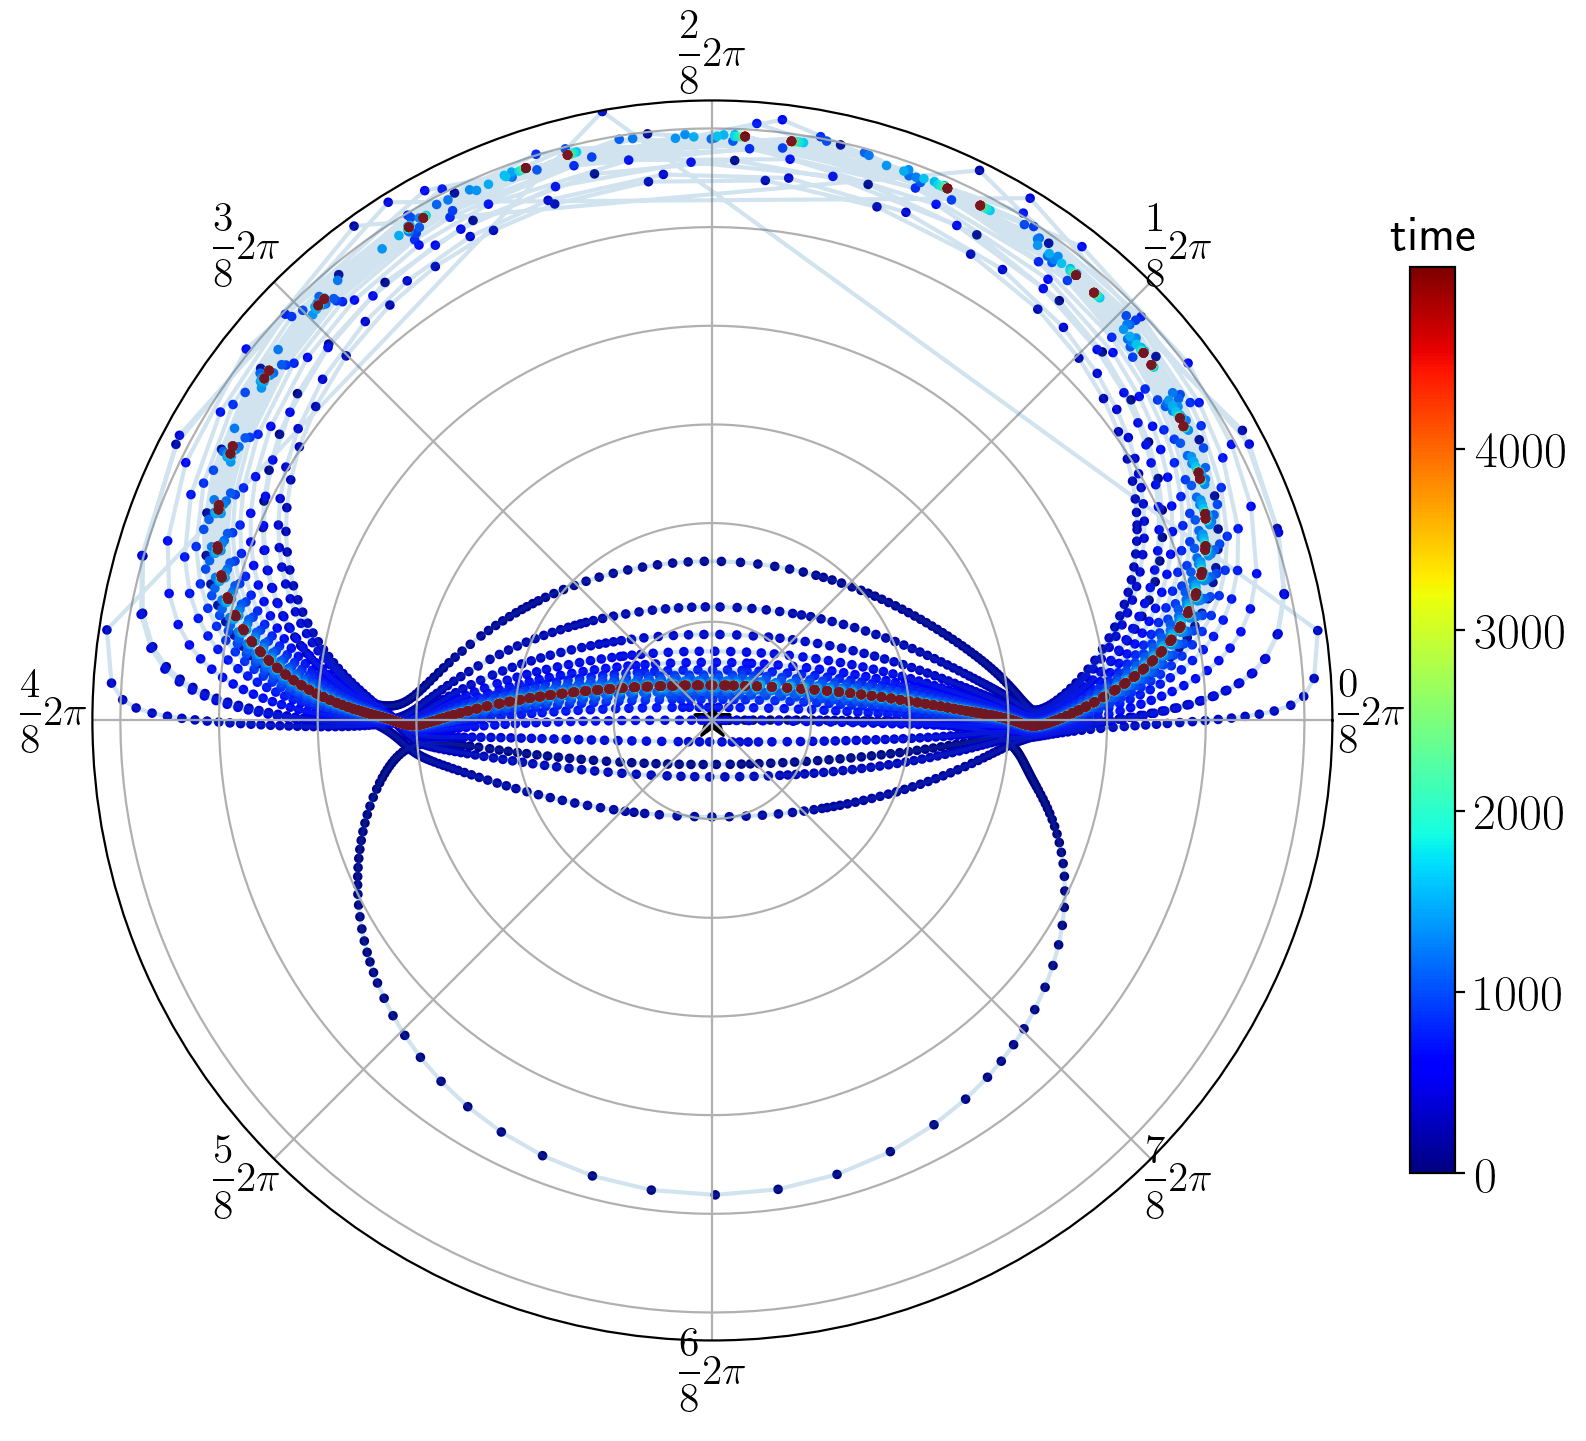

In [3]:
t0 = time()
# t_theta, t_phi, t_psi = 0, 0, 0
# t_theta, t_phi, t_psi = np.random.sample(3) * np.pi * (1, 2, 2)
# t_theta, t_phi, t_psi = 1.142, 5.141, 0.000  # C1
# t_theta, t_phi, t_psi = 1.142, 4.570, 0.000  # C2
# t_theta, t_phi, t_psi = 1.142, 4.284, 0.000  # C3
t_theta, t_phi, t_psi = 0.000, 1.714, 0.000  # C4
max_t = 5000
update_fun='5bs'
rtol=1e-9
atol=1e-12
eval_dt = 0.01
save_every = 1
omega_tail = 0
flow_strength = 1
table_name2 = 'ecoC01B05_baseFlow'

# base flow method 
t0 = time()
tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_ShearFlowPetsc4nPsiObj(tnorm, t_psi, max_t, update_fun=update_fun, 
                                      rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                      save_every=save_every, table_name=table_name2, 
                                      omega_tail=omega_tail, flow_strength=flow_strength)
t1 = time()
print('init \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (t_theta, t_phi, t_psi))
print('last \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (Table_theta[-1], Table_phi[-1], Table_psi[-1]))
print('%s: run %d loops/times using %fs' % ('do_ShearFlowPetsc4nPsiObj', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
# spf_tb.show_table_result_v2(Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, 
#                             Table_phi, Table_psi, Table_eta, save_every=save_every)
spf_tb.light_show_theta_phi(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                            Table_theta, Table_phi, Table_psi, Table_eta)

In [4]:
np.mean(Table_eta) / np.pi

0.4791981754827405


init \theta=1.142, \phi=4.284, \psi=0.000, 
last \theta=1.716, \phi=5.734, \psi=2.680, 
do_ShearFlowPetsc4nPsiObj: run 10000 loops/times using 173.735651s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 173.7s



init \theta=1.716, \phi=5.734, \psi=2.680, 
last \theta=1.576, \phi=3.565, \psi=1.111, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 88.206535s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 88.2s



init \theta=1.576, \phi=3.565, \psi=1.111, 
last \theta=1.539, \phi=4.781, \psi=0.907, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 136.547703s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 136.5s



init \theta=1.539, \phi=4.781, \psi=0.907, 
last \theta=1.569, \phi=4.529, \psi=1.306, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 140.141106s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 140.1s



init \theta=1.569, \phi=4.529, \psi=1.306, 
last \theta=1.550, \phi=4.656, \psi=4.214, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 136.006299s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 136.0s



init \theta=1.550, \phi=4.656, \psi=4.214, 
last \theta=1.560, \phi=4.486, \psi=1.613, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 133.829886s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 133.8s



init \theta=1.560, \phi=4.486, \psi=1.613, 
last \theta=1.535, \phi=4.819, \psi=2.638, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 129.196289s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 129.2s



init \theta=1.535, \phi=4.819, \psi=2.638, 
last \theta=1.552, \phi=4.423, \psi=2.410, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 126.621525s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 126.6s



init \theta=1.552, \phi=4.423, \psi=2.410, 
last \theta=1.526, \phi=4.663, \psi=1.445, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 124.509582s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 124.5s



init \theta=1.526, \phi=4.663, \psi=1.445, 
last \theta=1.592, \phi=4.878, \psi=1.795, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 119.408036s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 119.4s



init \theta=1.592, \phi=4.878, \psi=1.795, 
last \theta=1.588, \phi=4.937, \psi=3.426, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 118.320736s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 118.3s



init \theta=1.588, \phi=4.937, \psi=3.426, 
last \theta=1.538, \phi=4.703, \psi=3.870, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 119.796742s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 119.8s



init \theta=1.538, \phi=4.703, \psi=3.870, 
last \theta=1.575, \phi=4.350, \psi=4.742, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 117.487084s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 117.5s



init \theta=1.536, \phi=4.389, \psi=4.347, 
last \theta=1.554, \phi=5.347, \psi=1.393, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 115.898169s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 115.9s



init \theta=1.554, \phi=5.347, \psi=1.393, 
last \theta=1.611, \phi=4.918, \psi=1.090, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 119.174843s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 119.2s



init \theta=1.611, \phi=4.918, \psi=1.090, 
last \theta=1.539, \phi=4.425, \psi=3.260, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 119.871830s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 119.9s



init \theta=1.539, \phi=4.425, \psi=3.260, 
last \theta=1.548, \phi=4.915, \psi=4.401, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 121.859816s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 121.9s



init \theta=1.548, \phi=4.915, \psi=4.401, 
last \theta=1.578, \phi=4.718, \psi=4.586, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 124.841460s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 124.8s



init \theta=1.578, \phi=4.718, \psi=4.586, 
last \theta=1.578, \phi=4.718, \psi=4.661, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 115.364992s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 115.4s



init \theta=1.578, \phi=4.718, \psi=4.661, 
last \theta=1.578, \phi=4.718, \psi=4.713, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 120.760446s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 120.8s


/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



init \theta=1.578, \phi=4.718, \psi=4.713, 
last \theta=1.579, \phi=4.718, \psi=4.756, 
do_ShearFlowPetsc4nPsiObj: run 5000 loops/times using 127.259811s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 127.3s


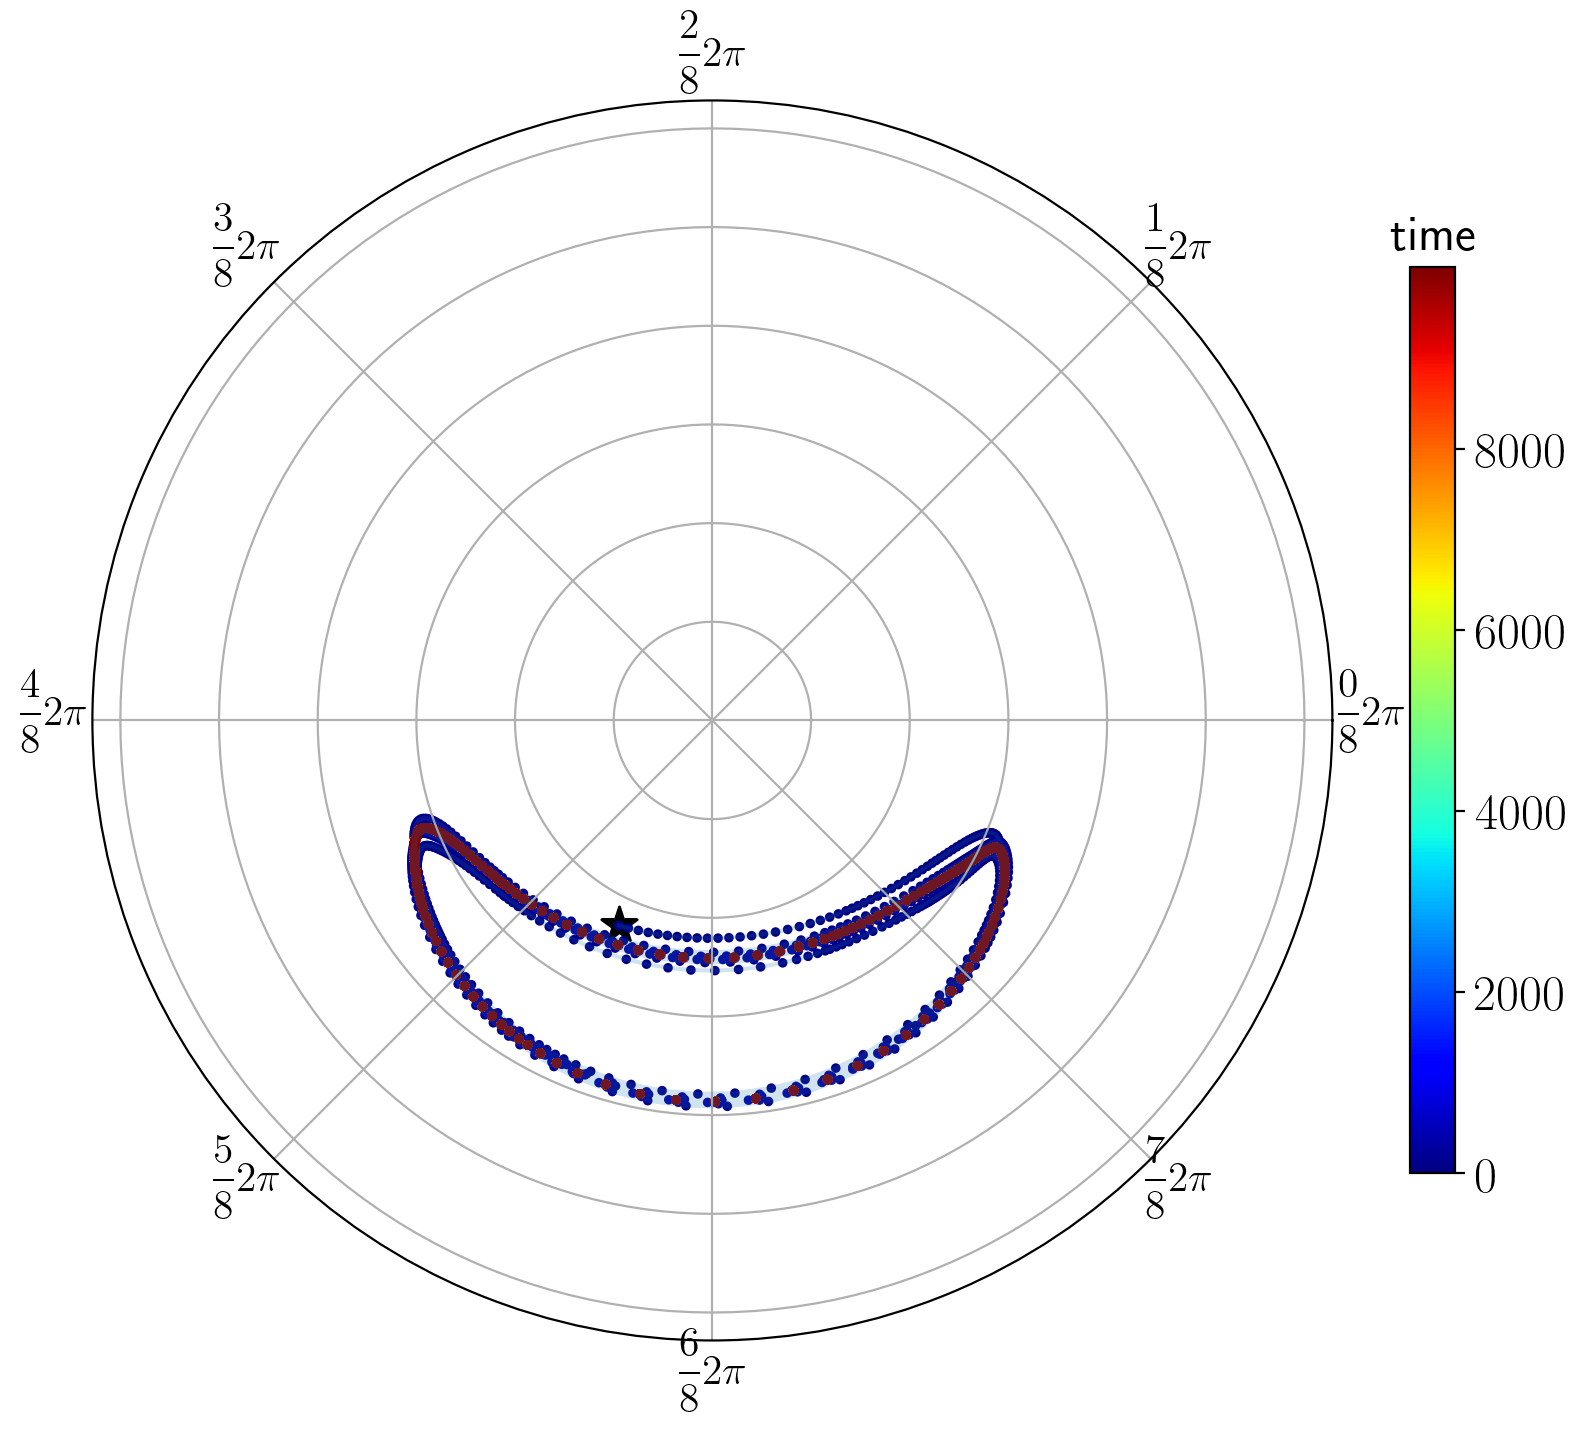

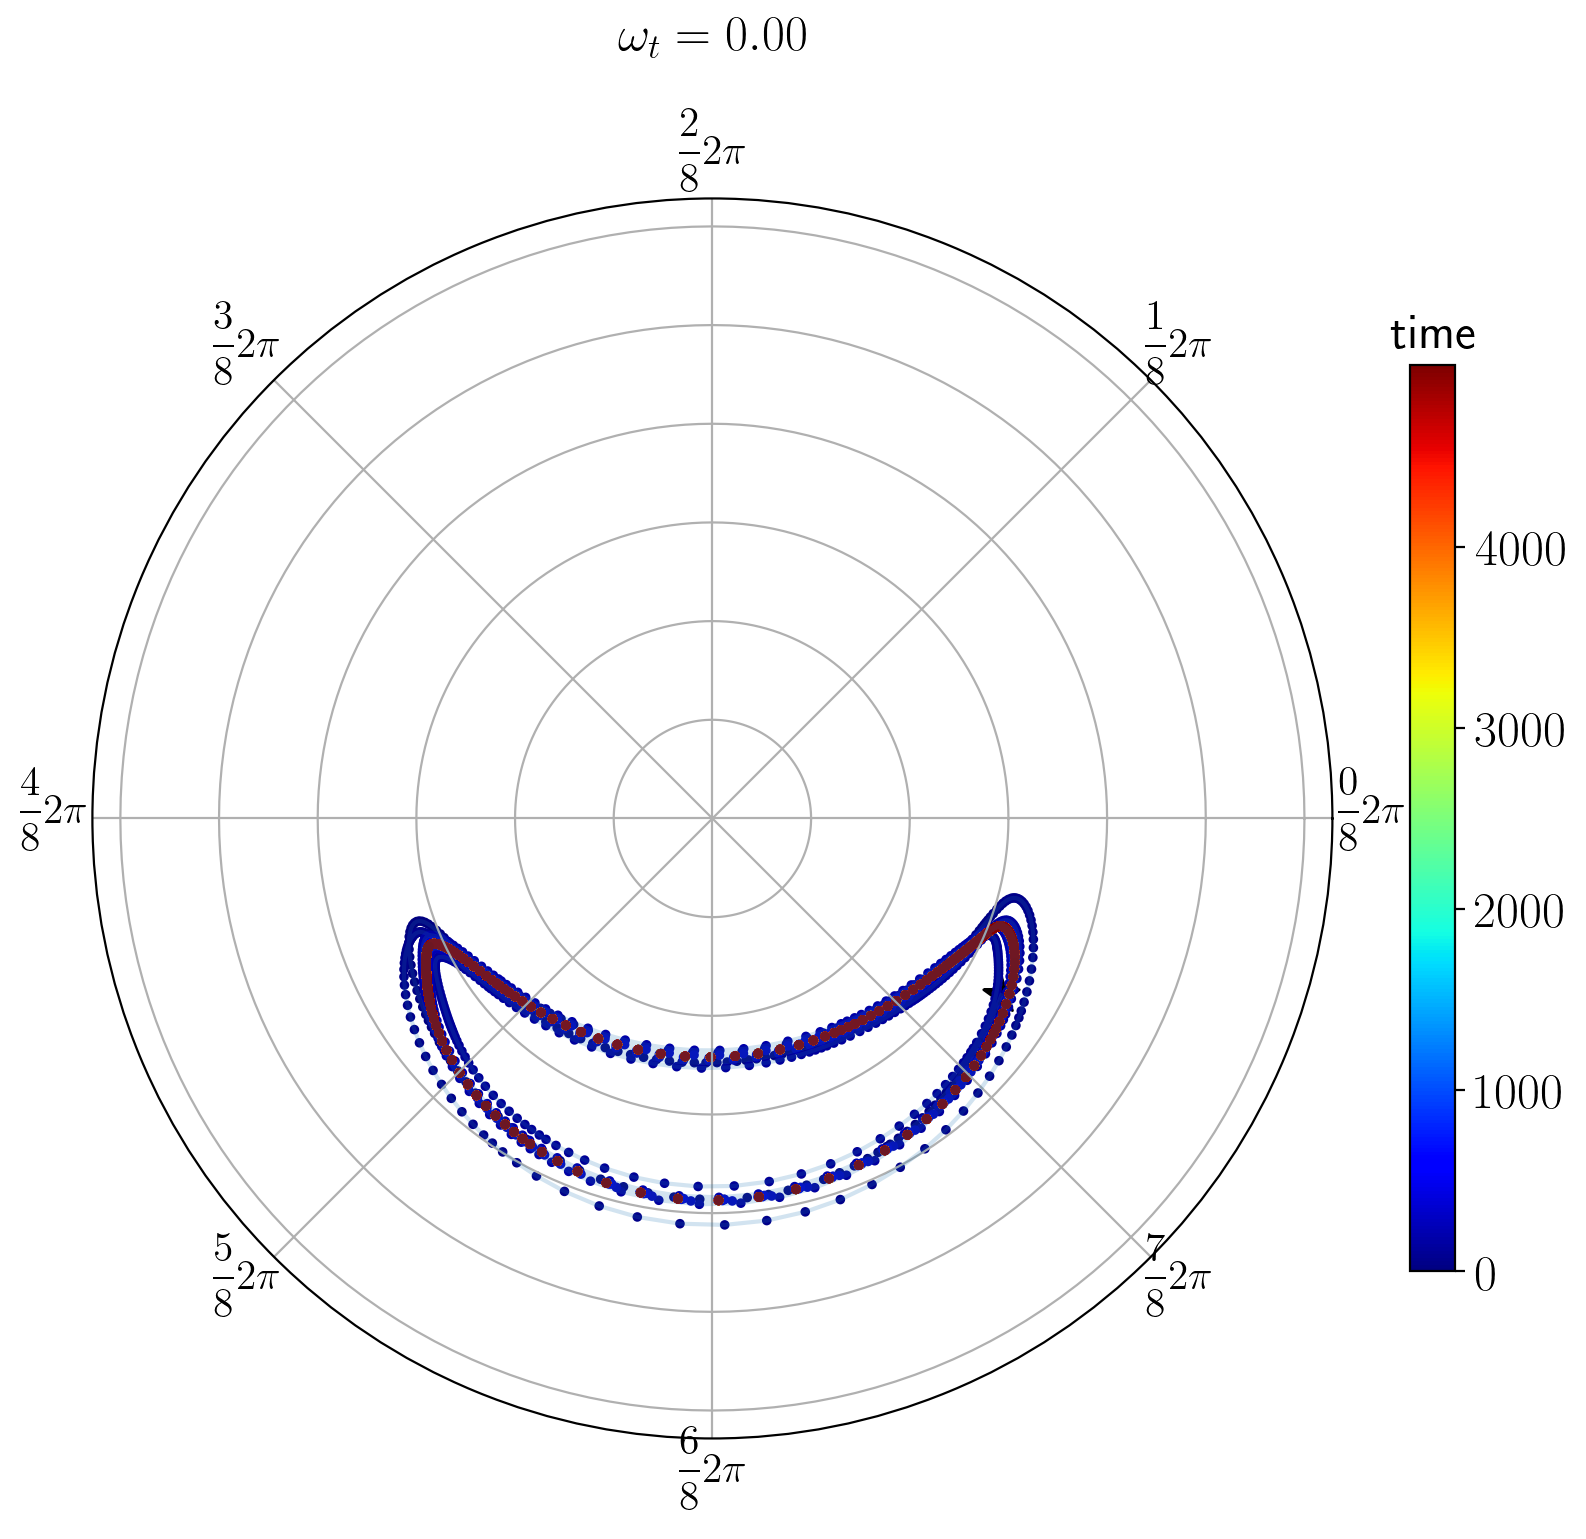

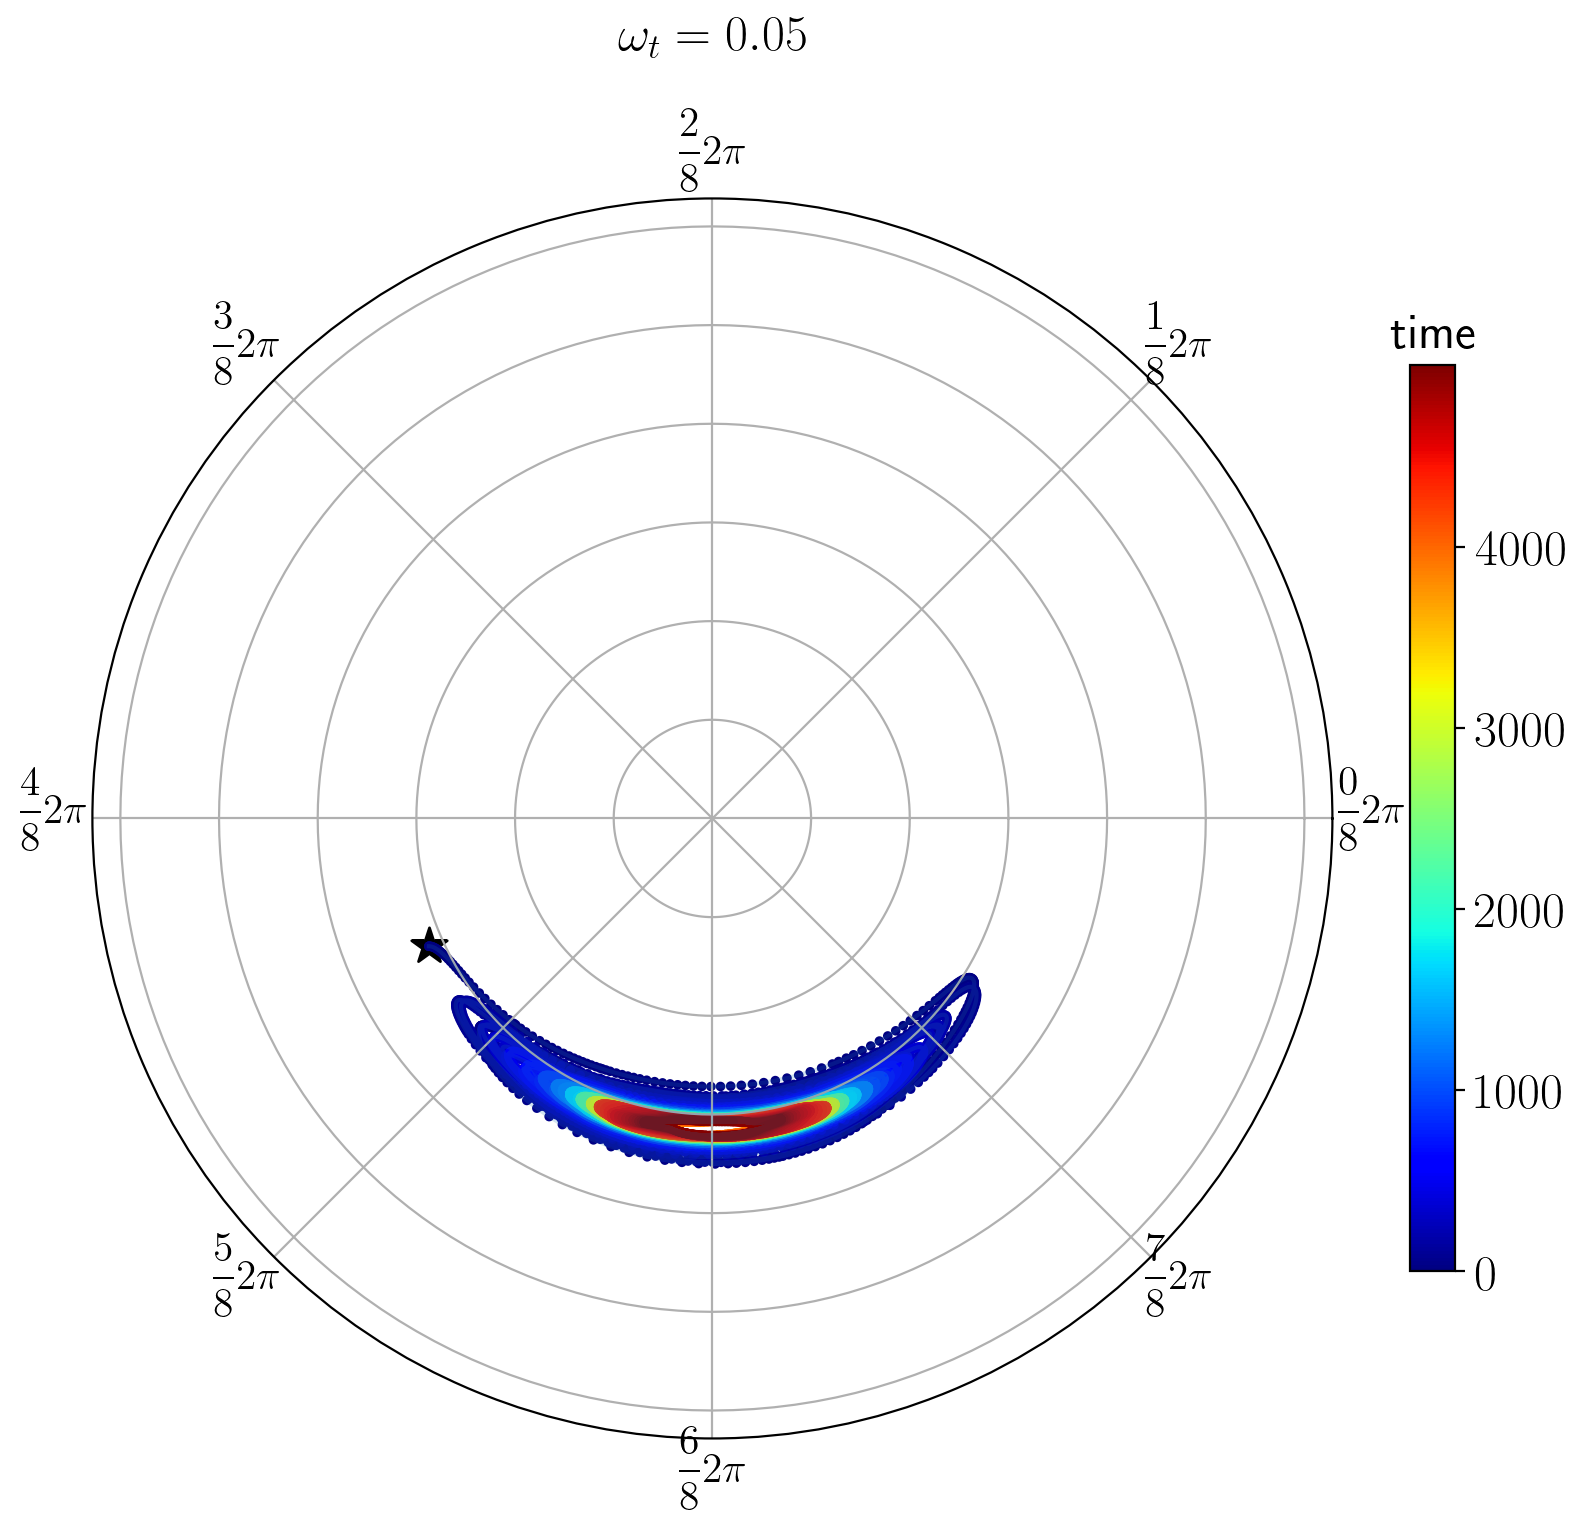

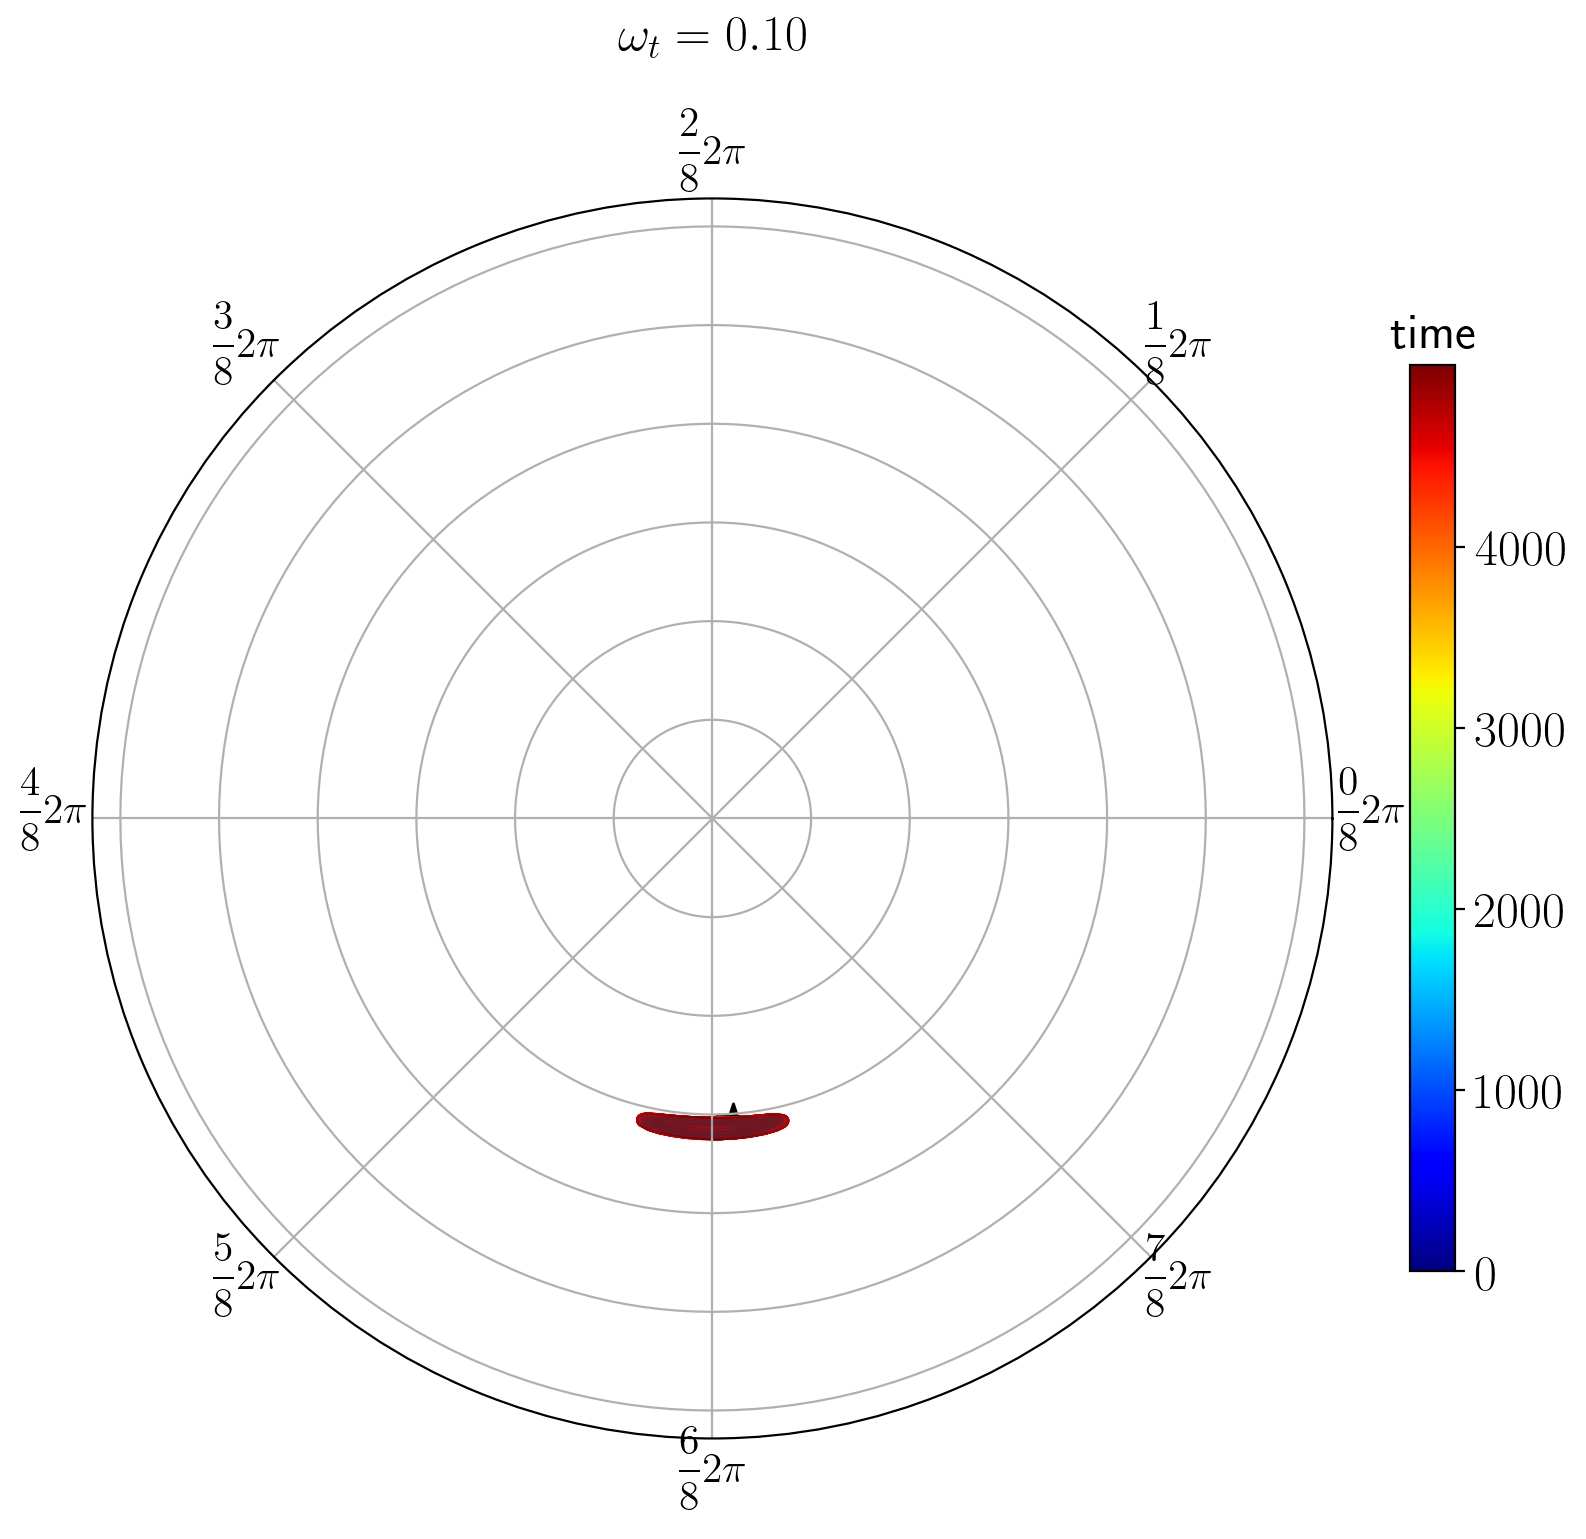

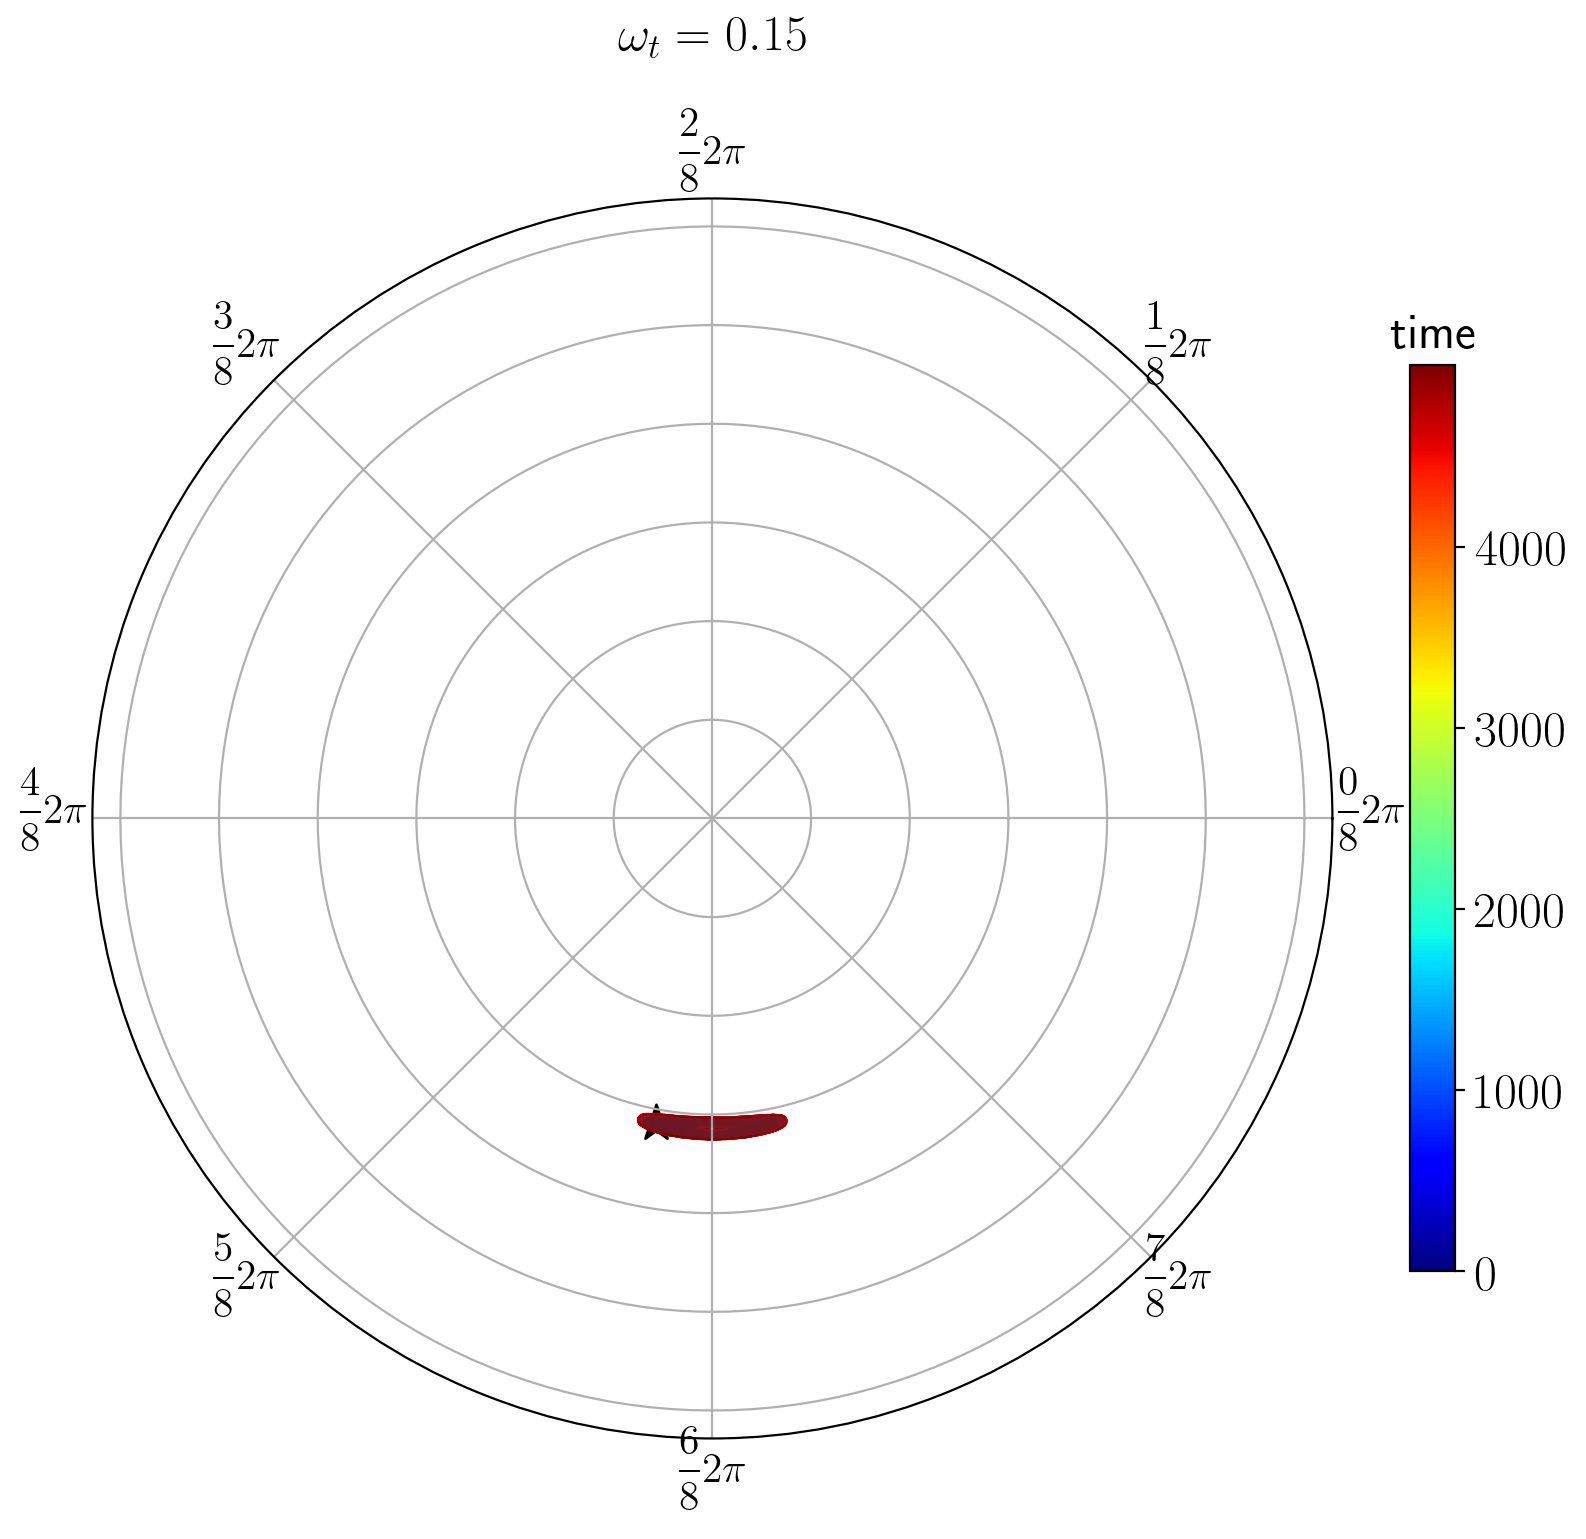

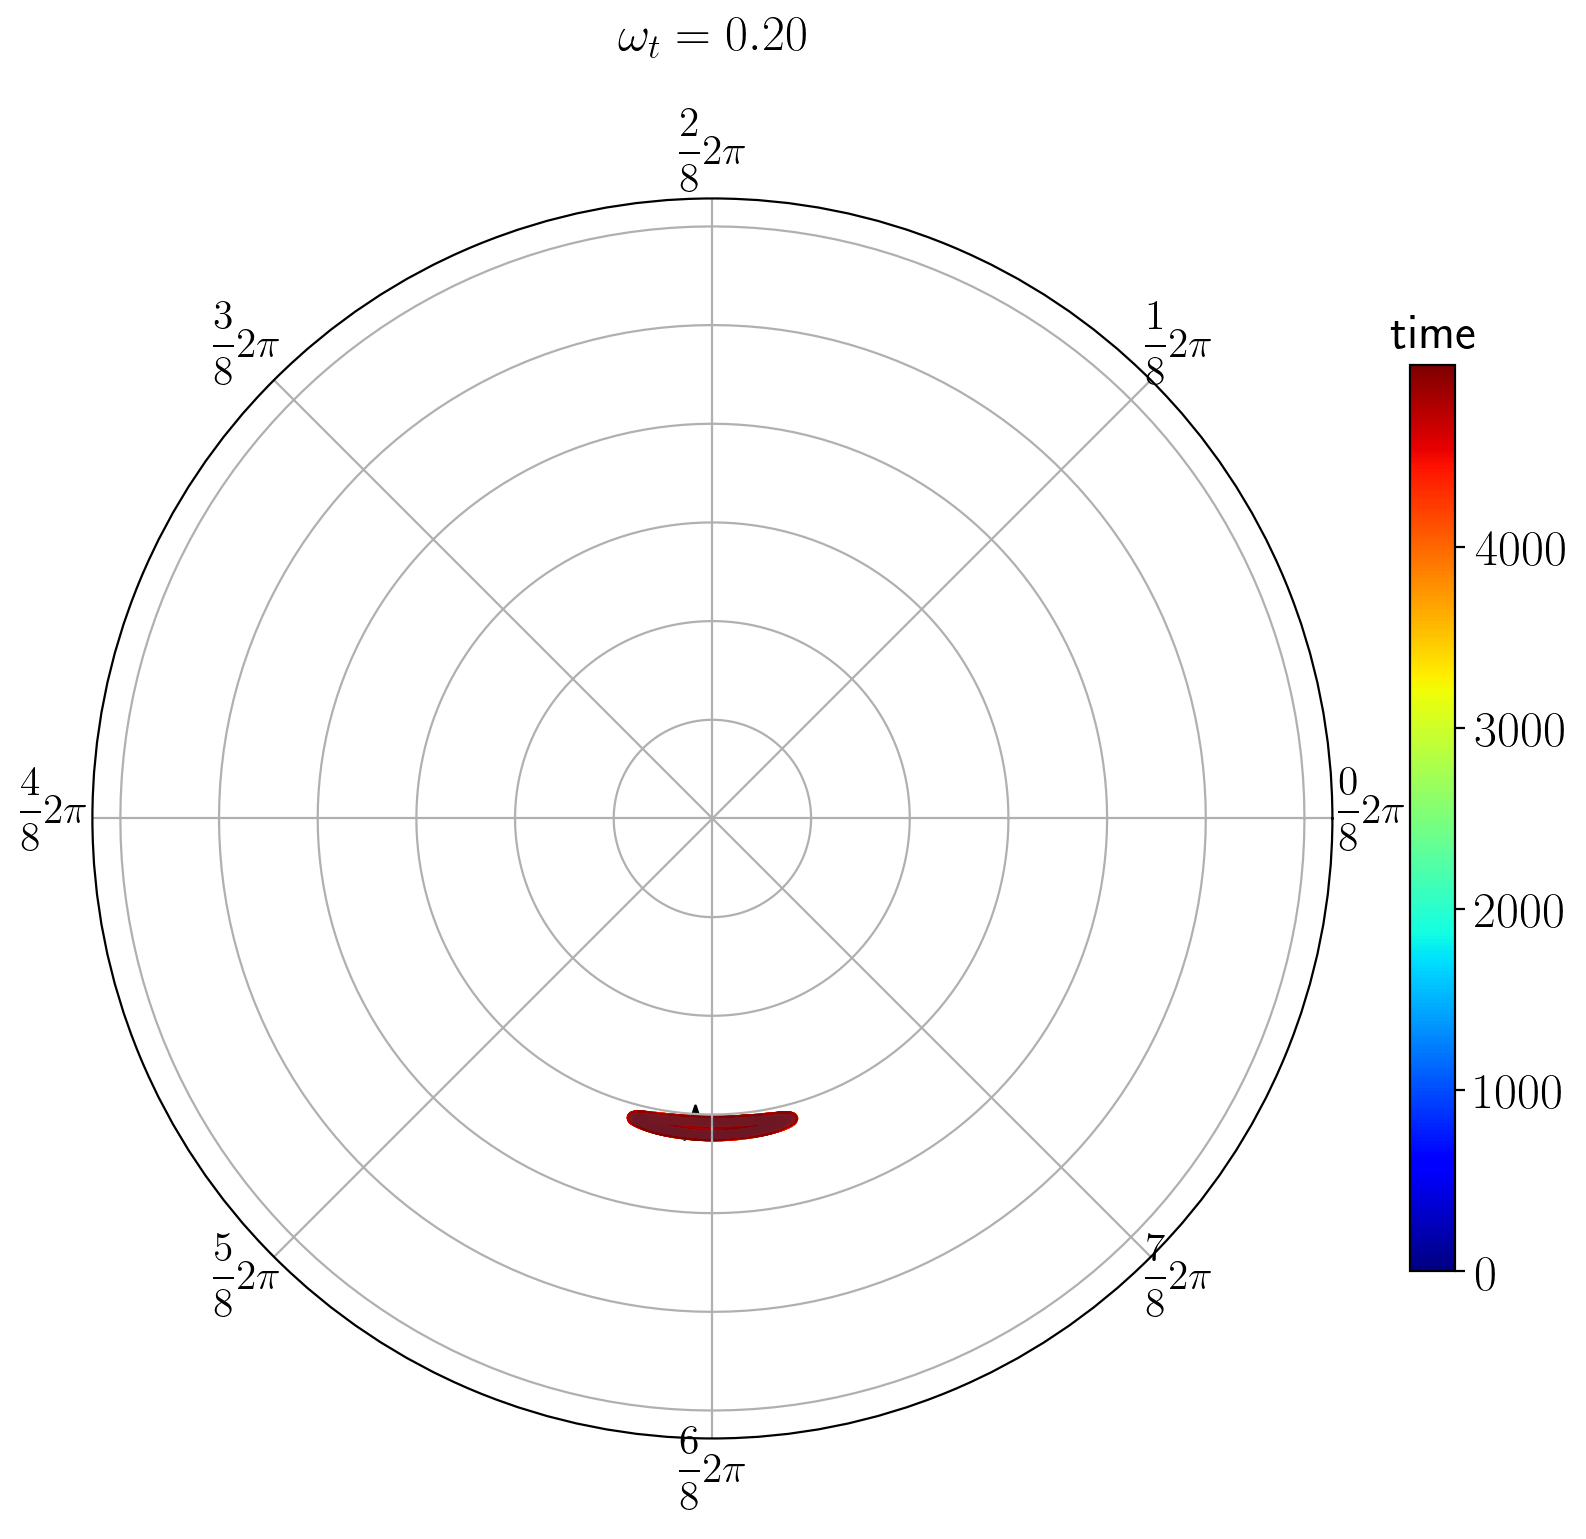

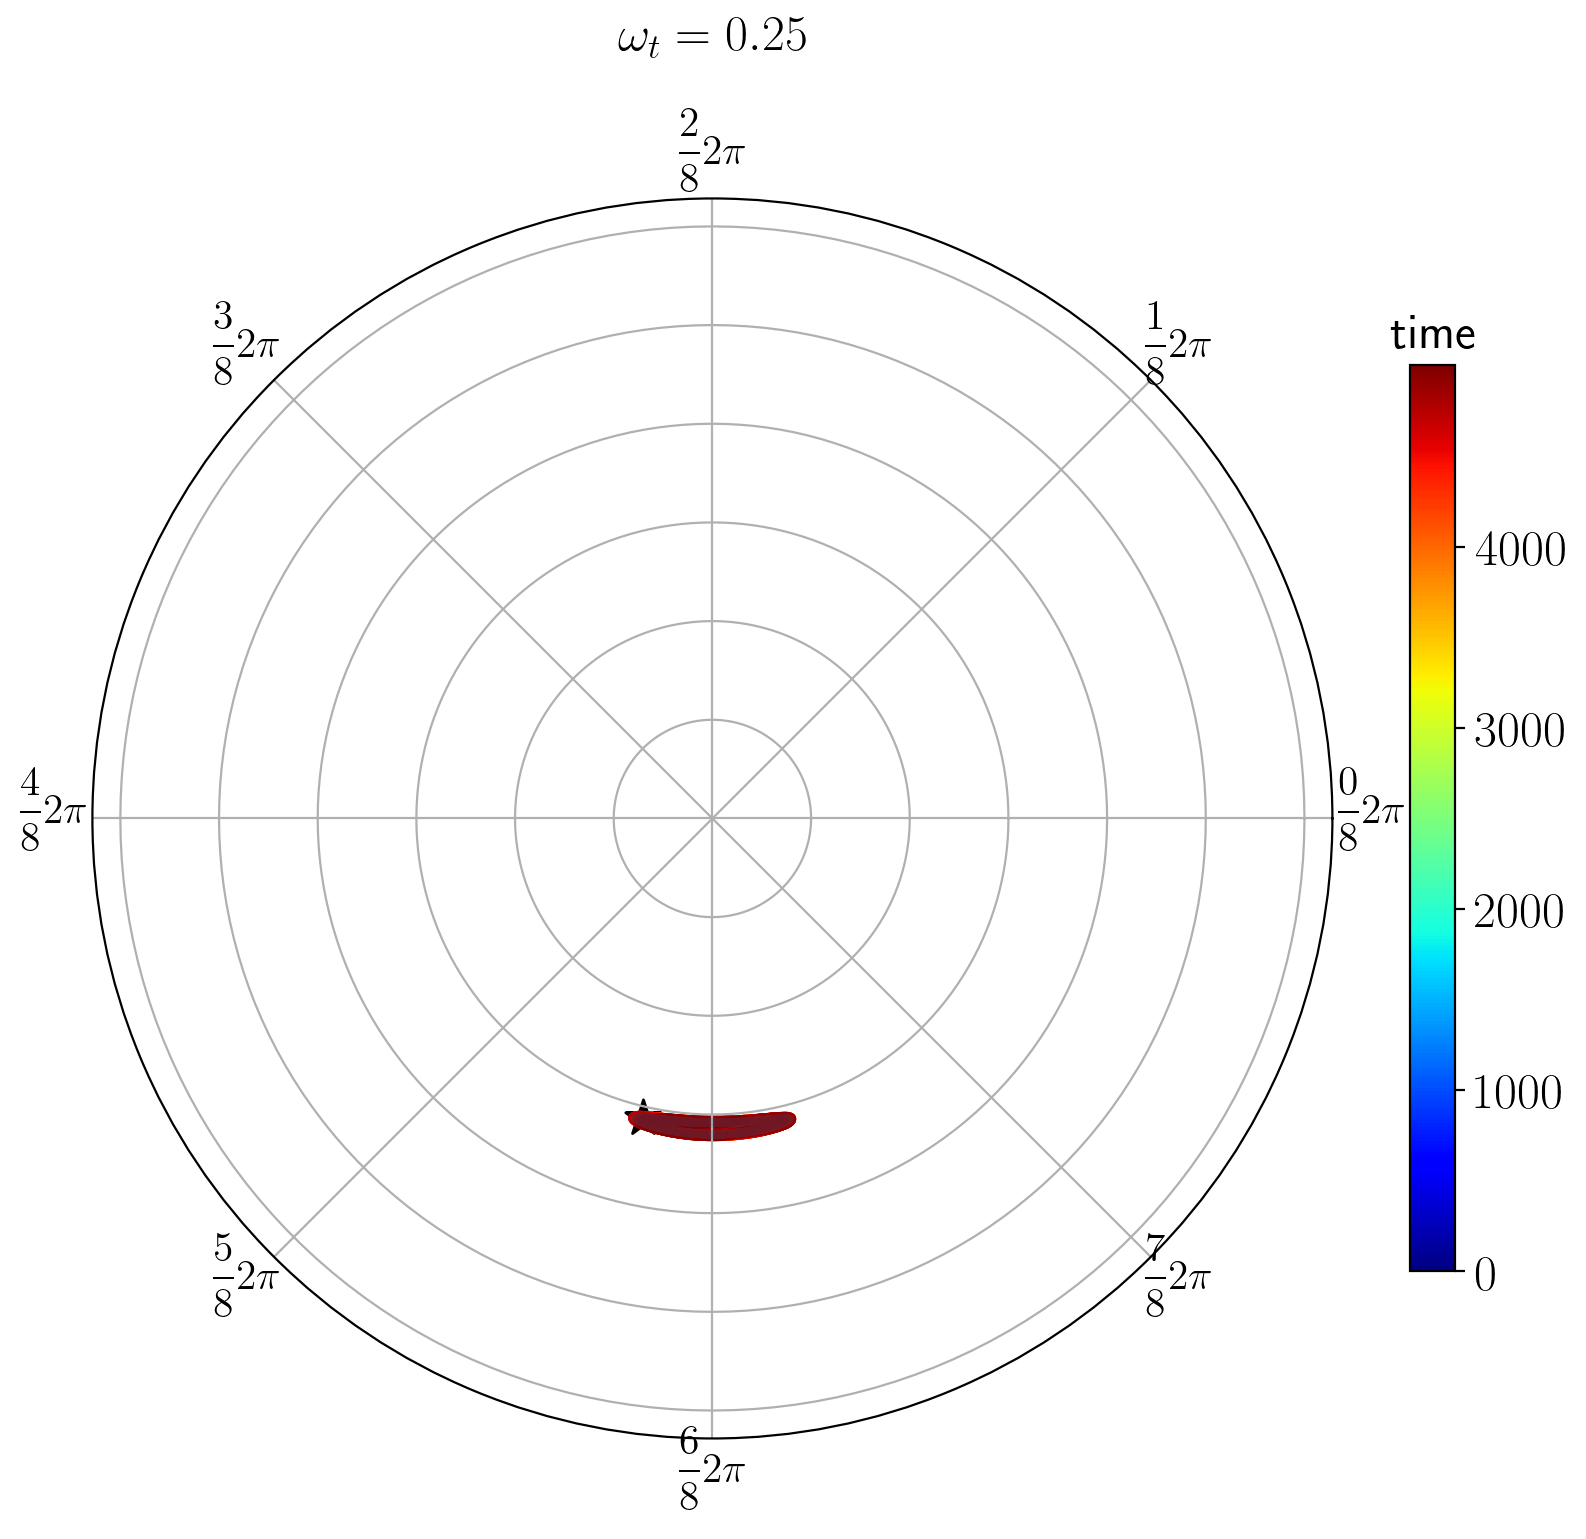

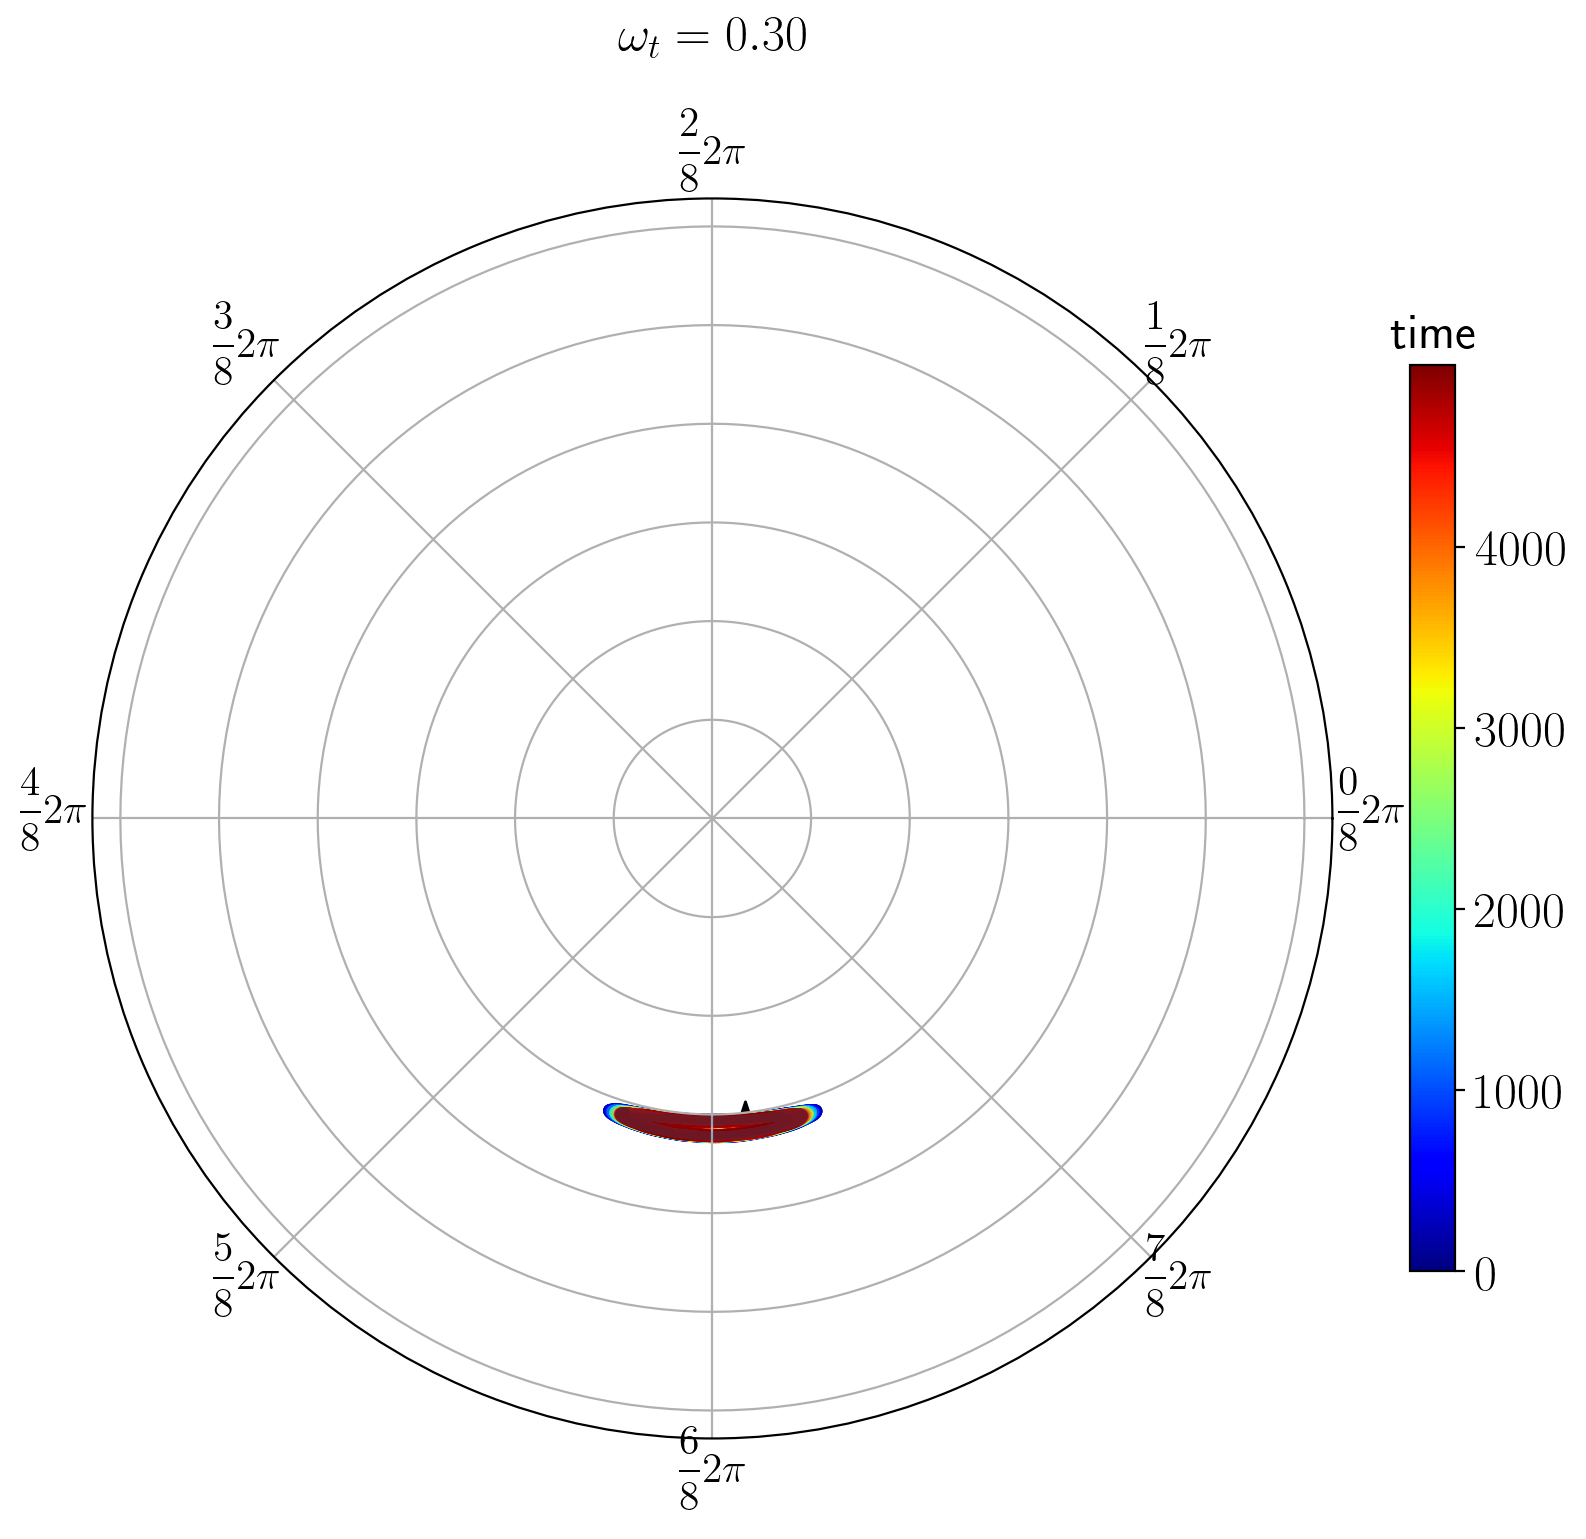

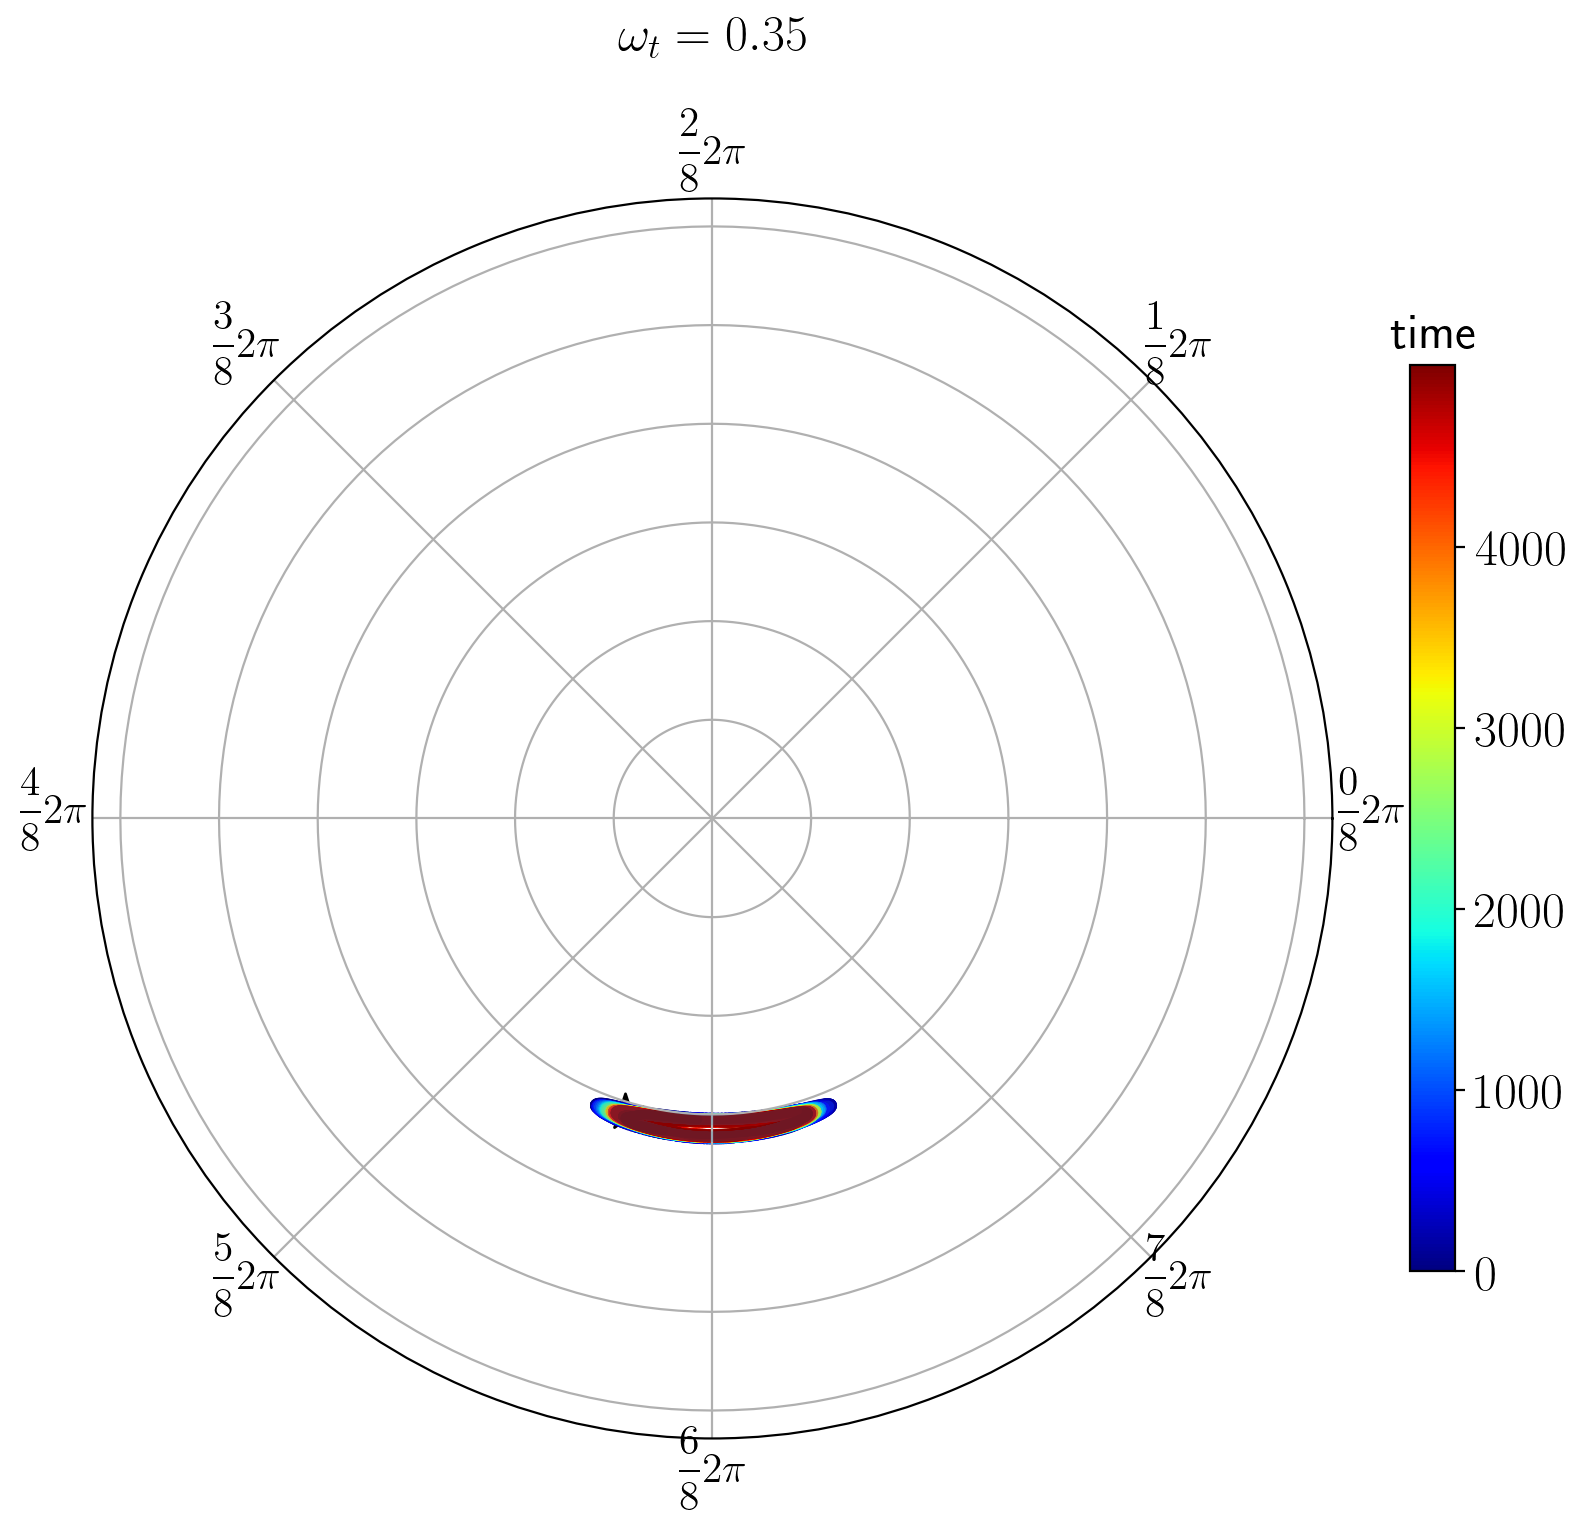

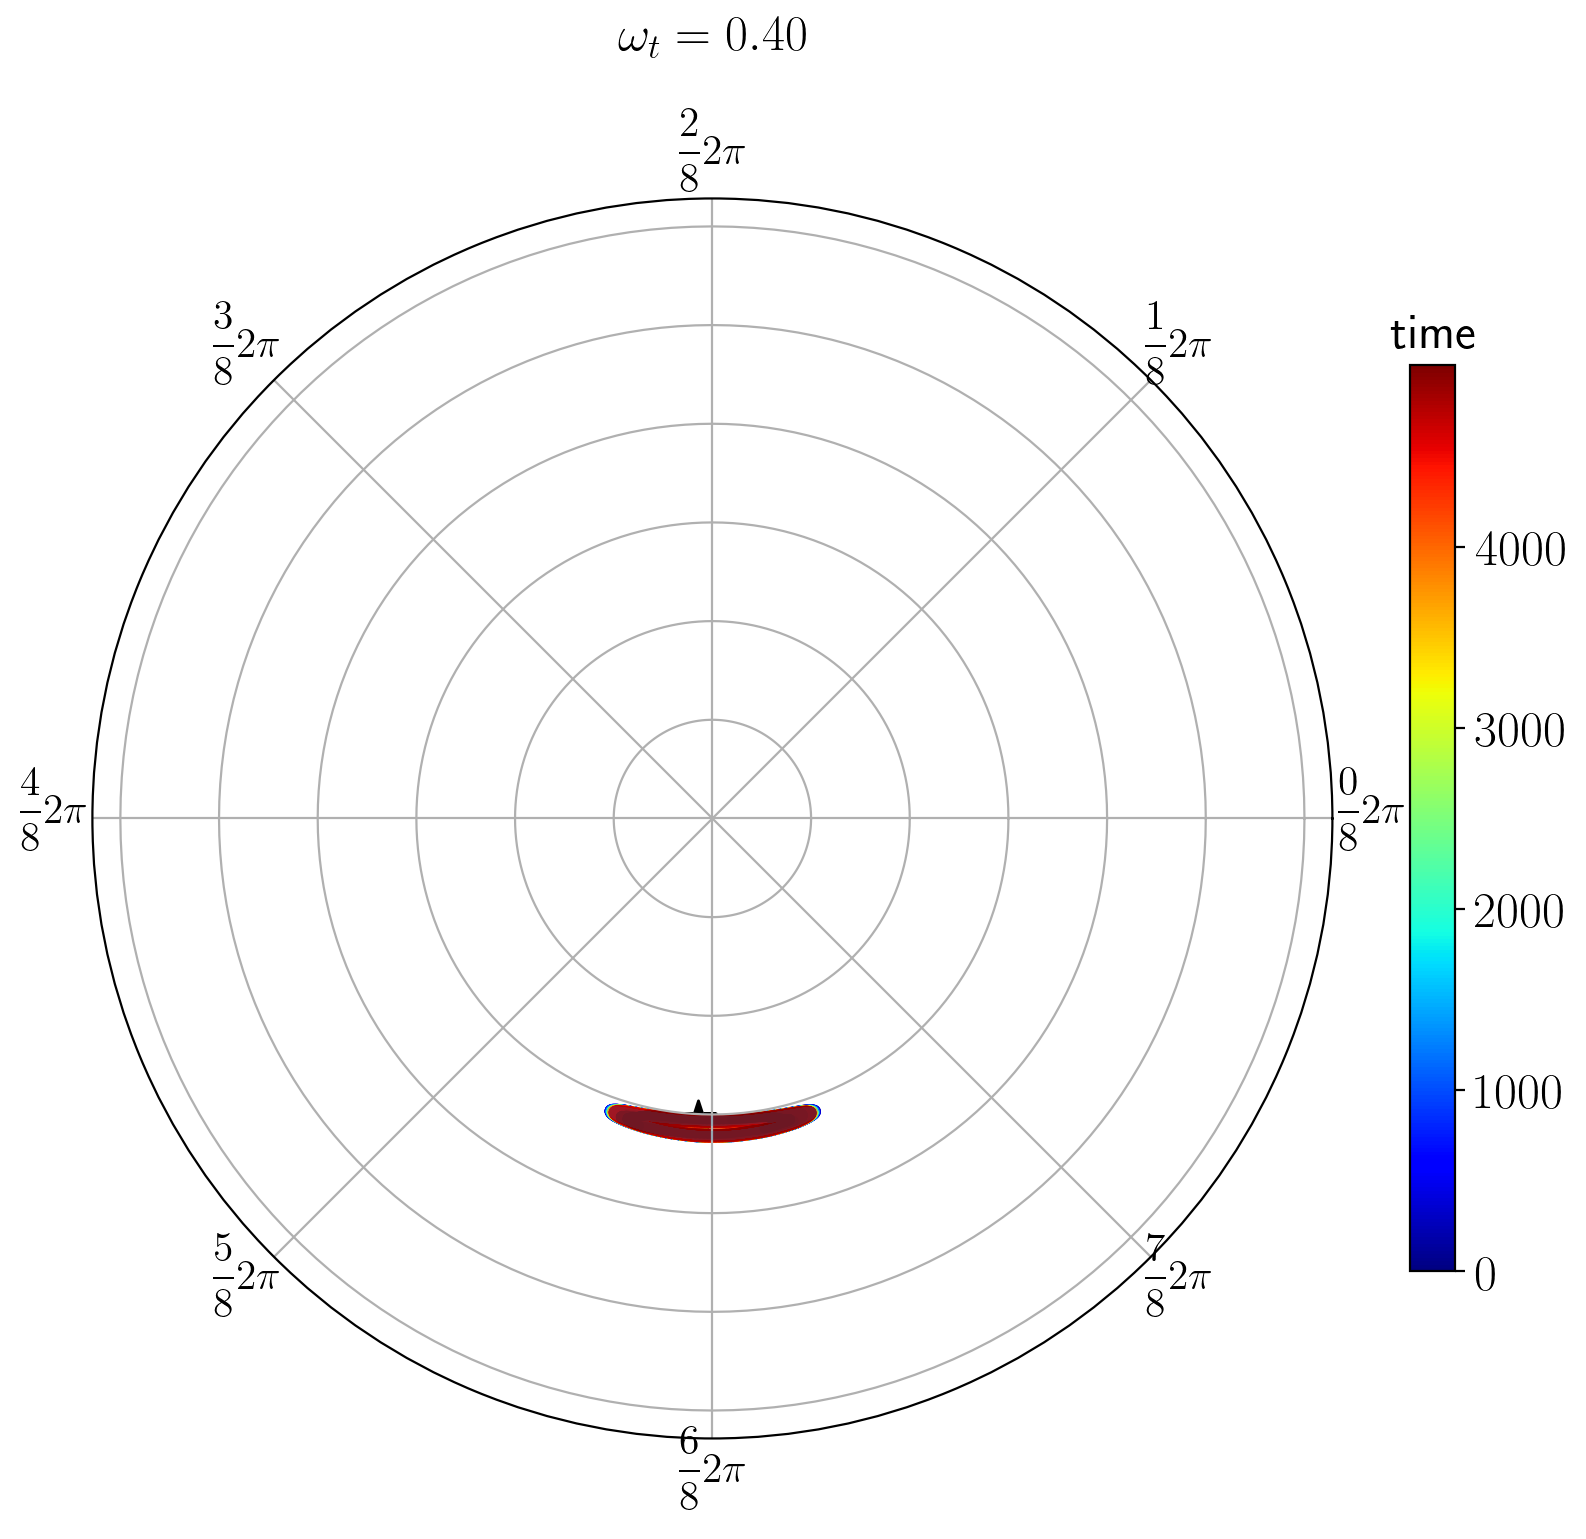

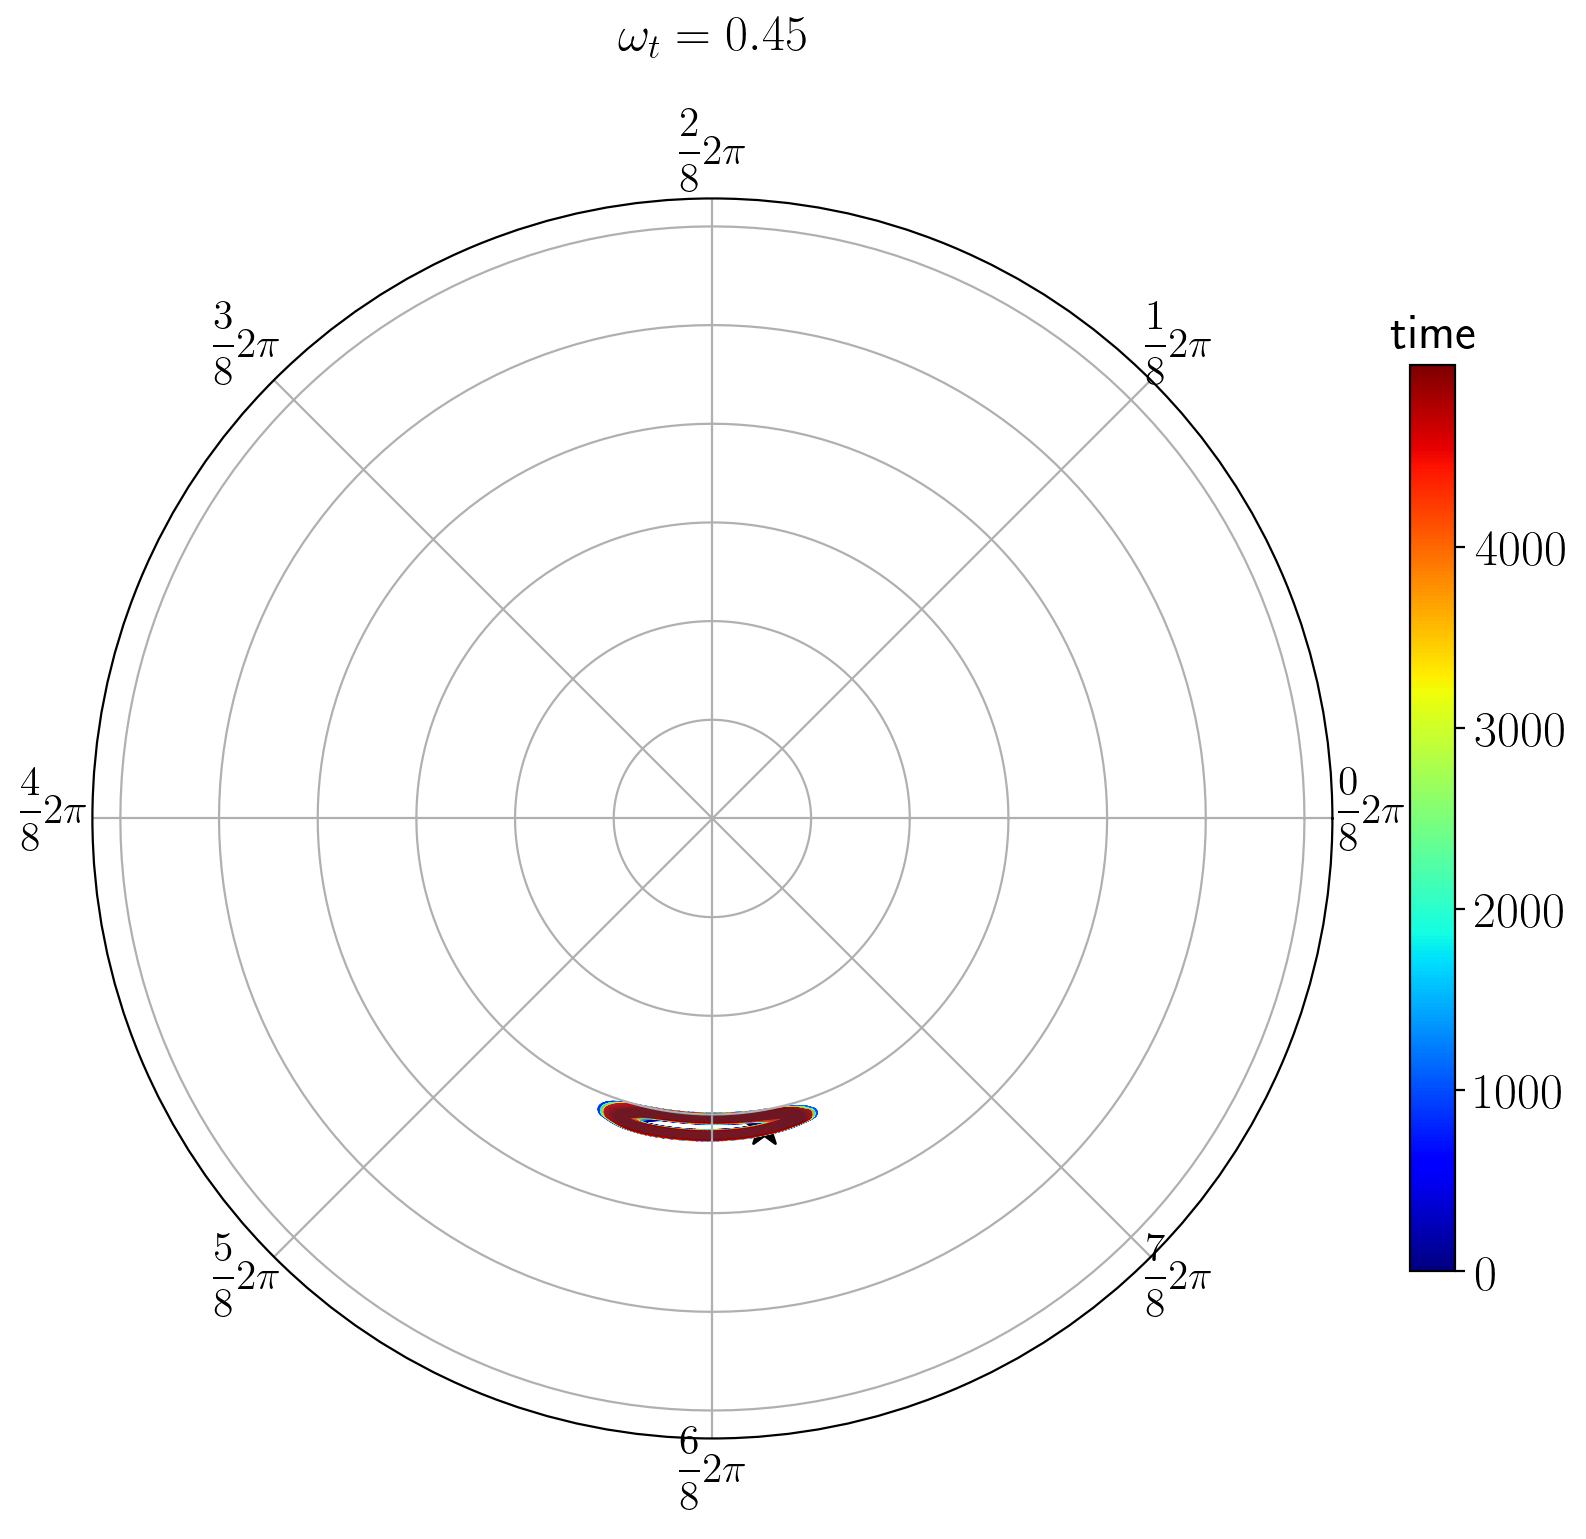

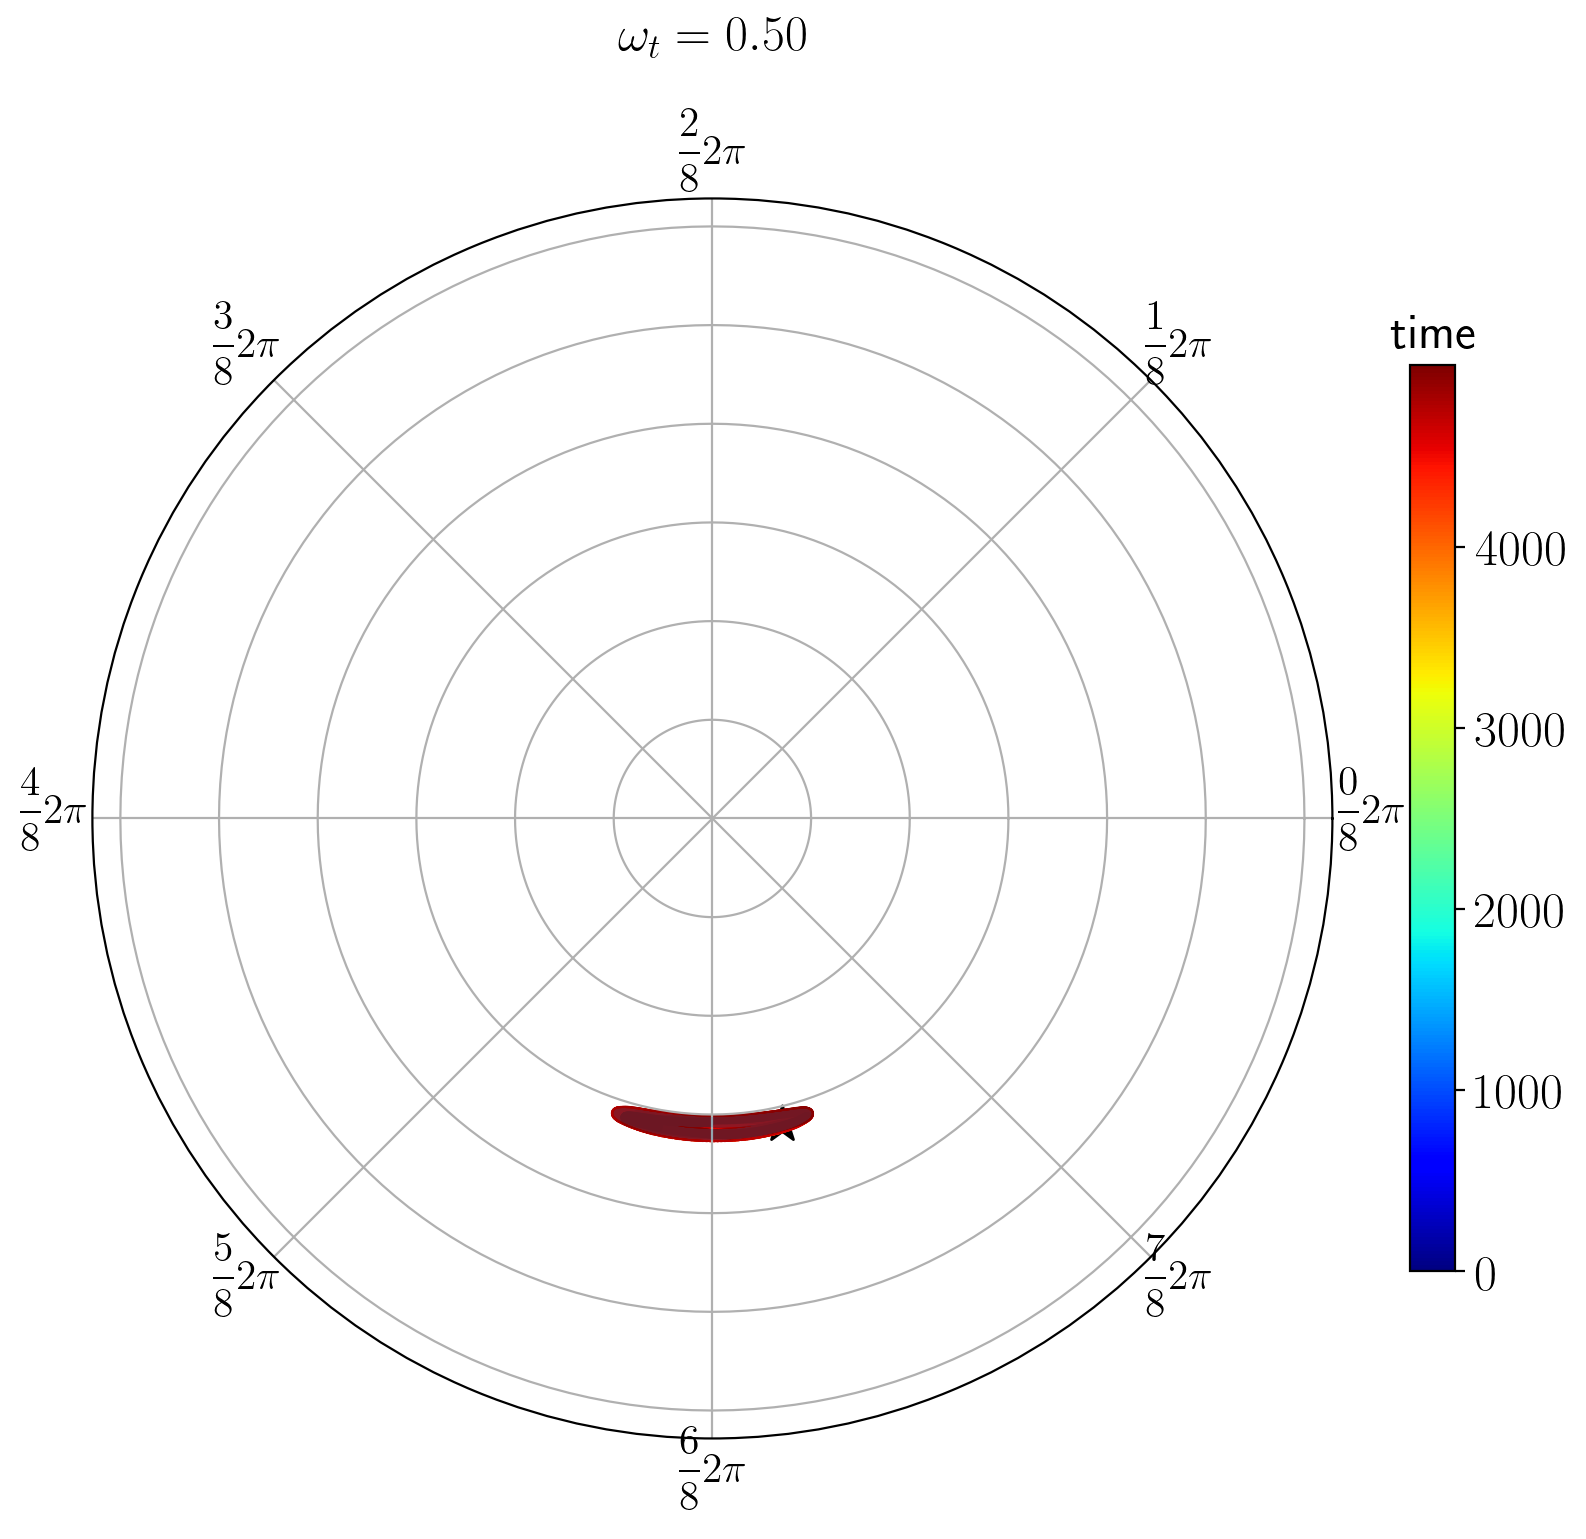

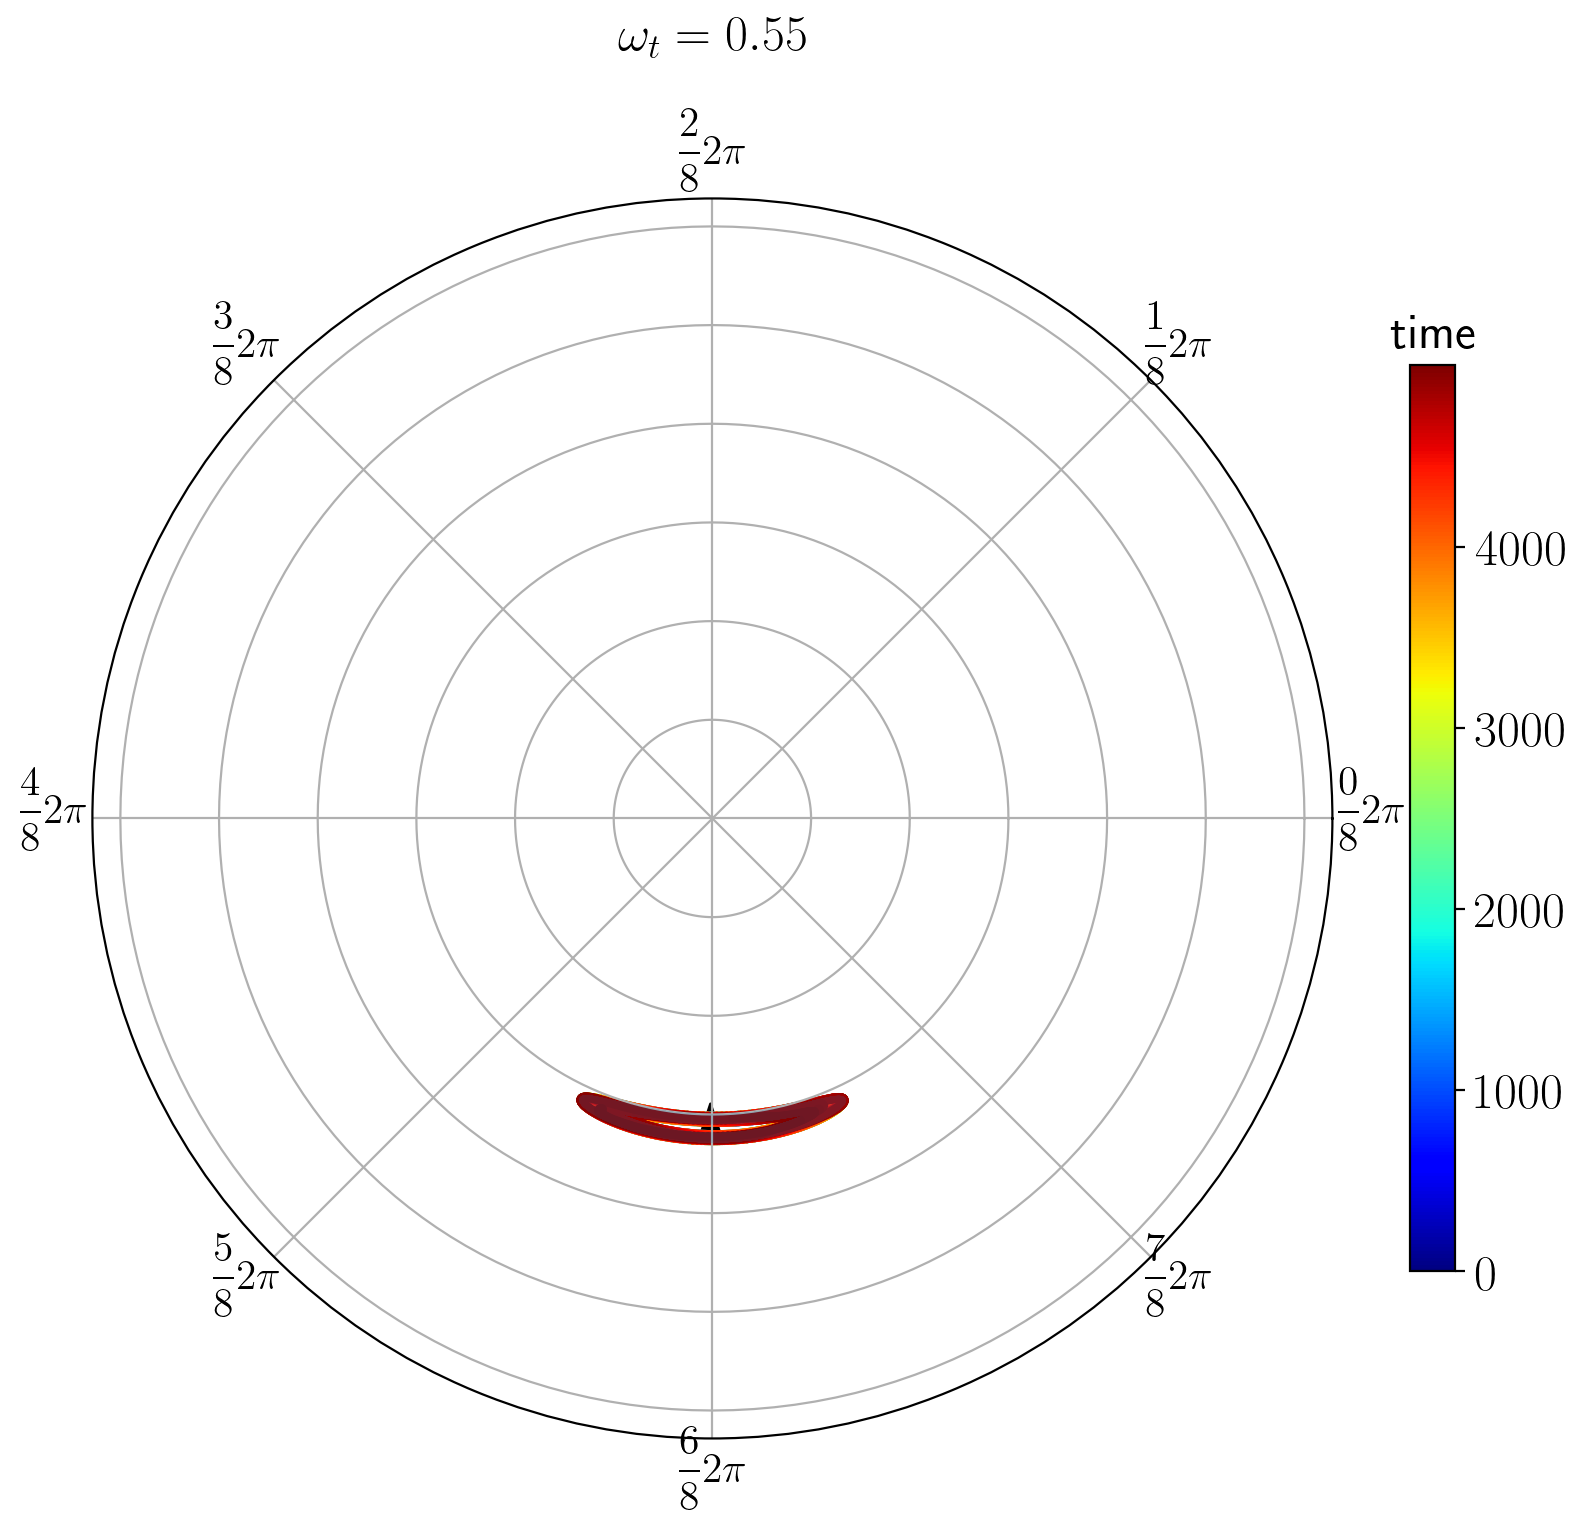

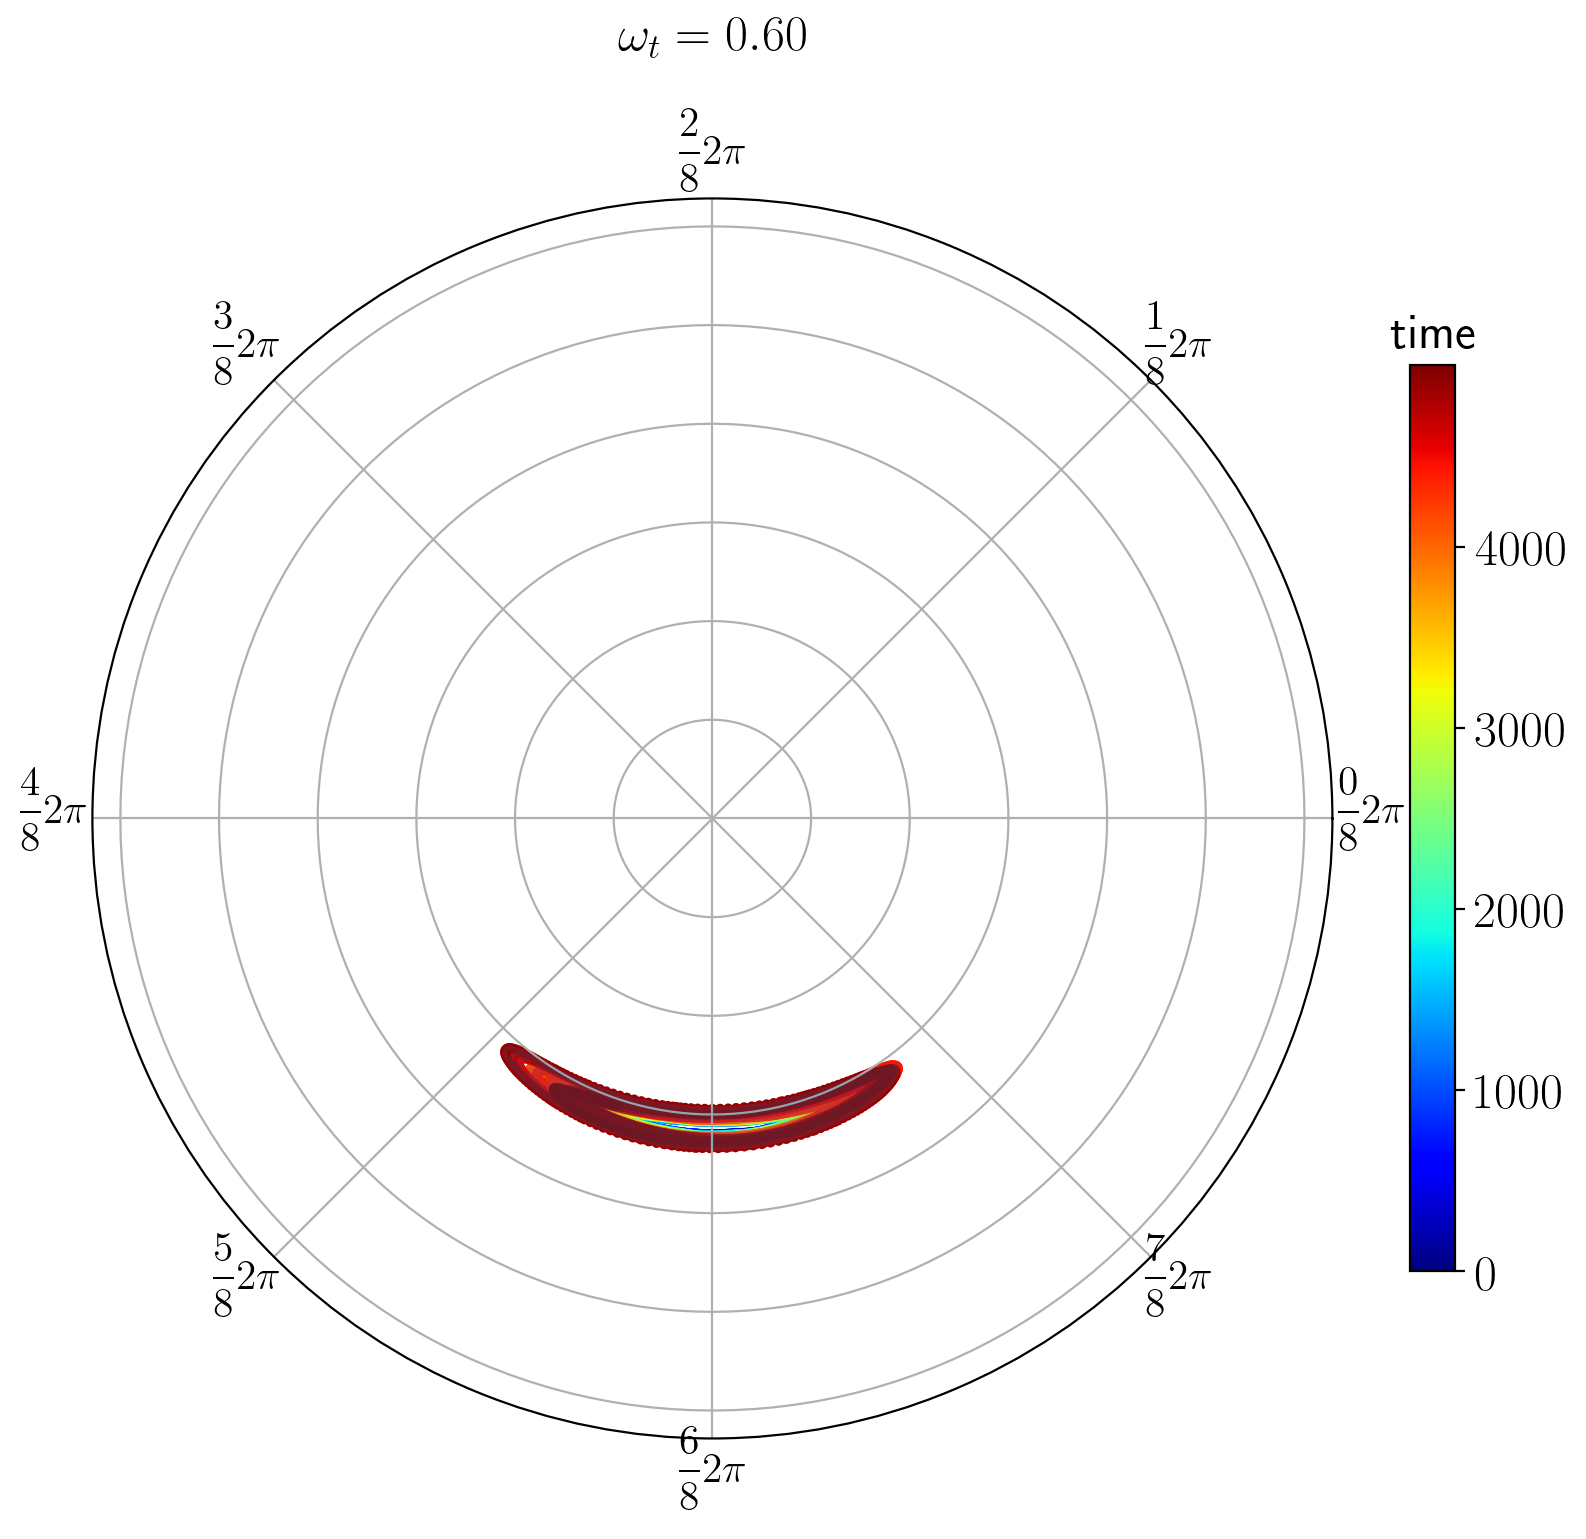

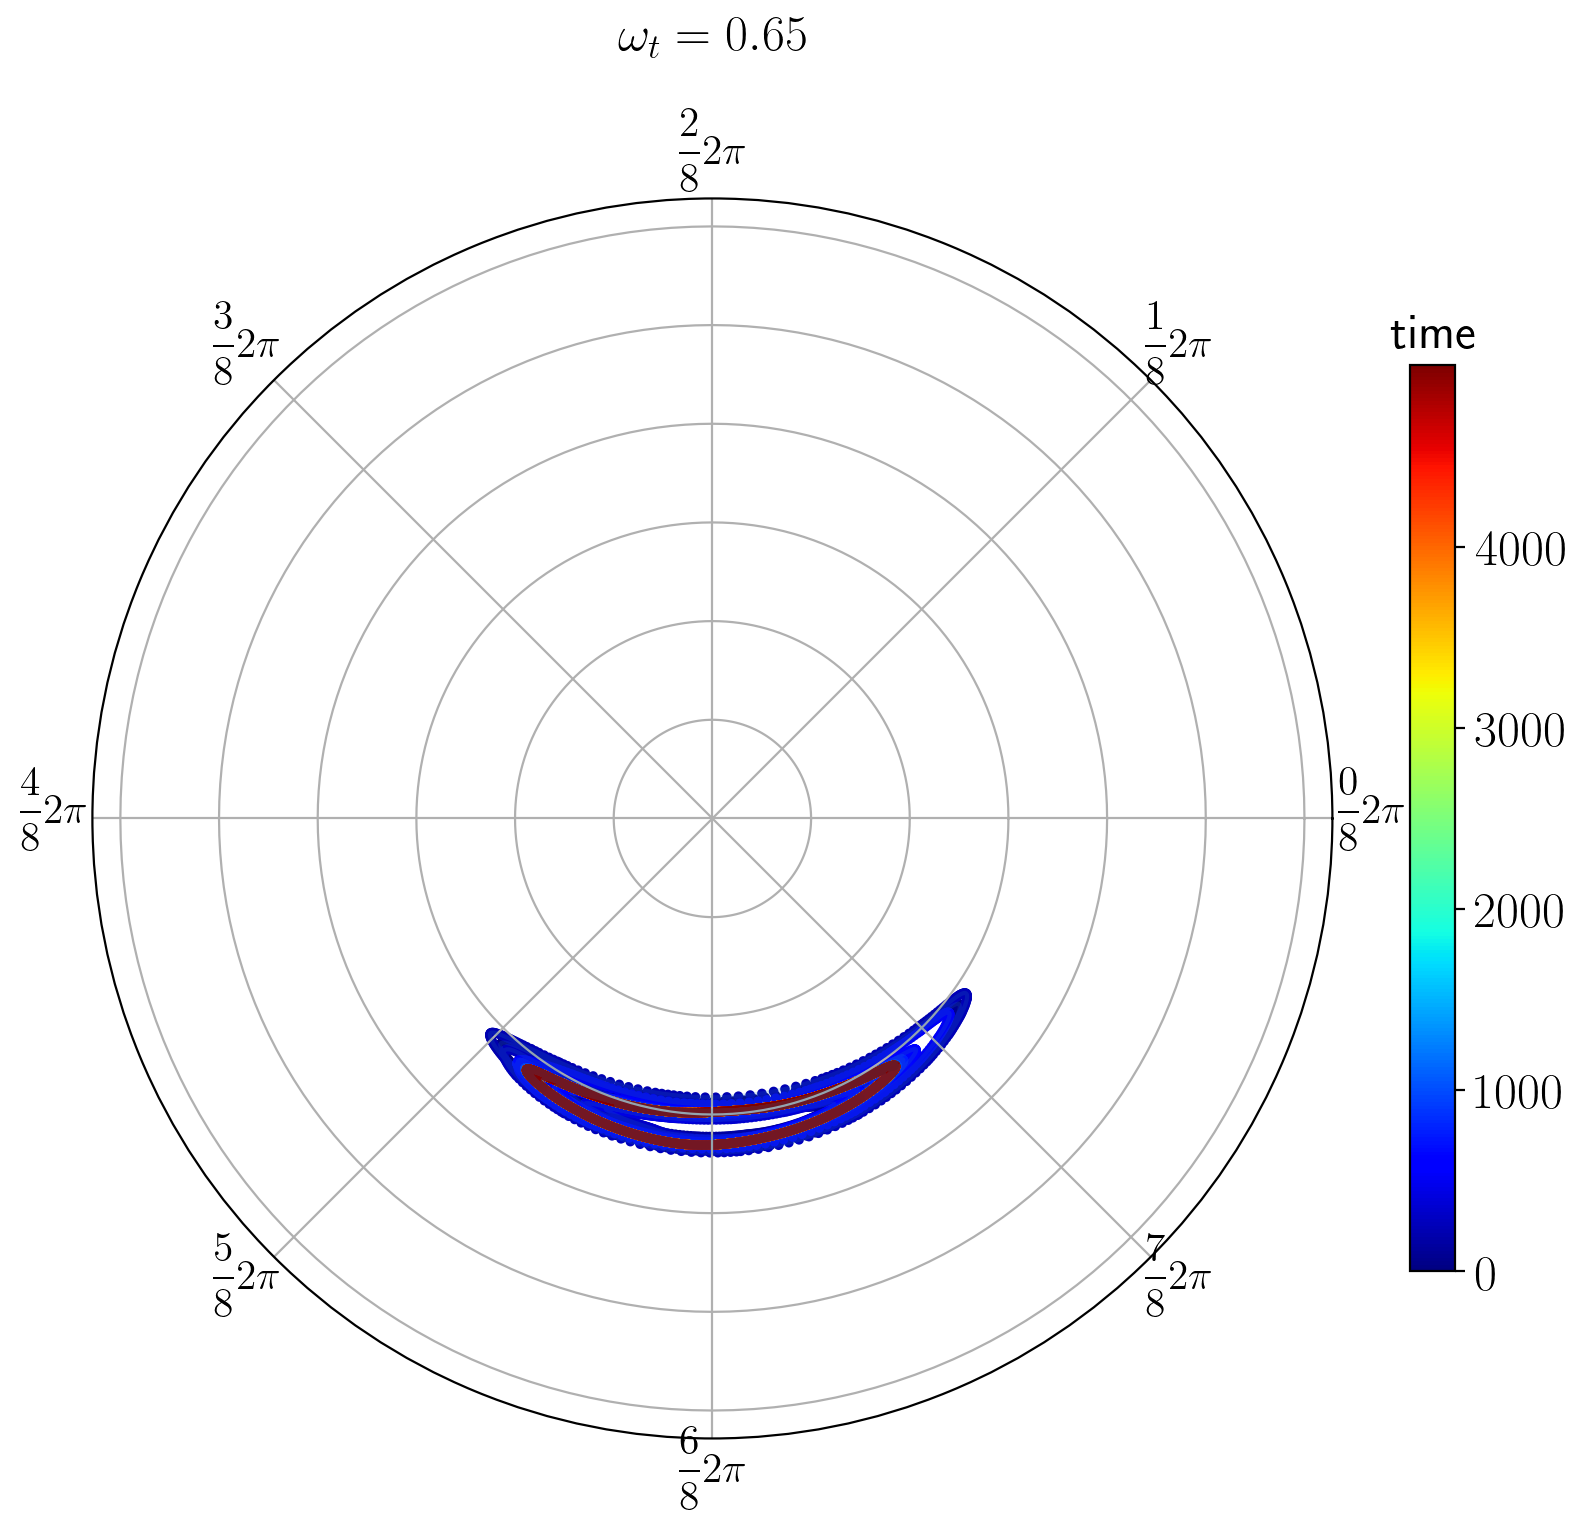

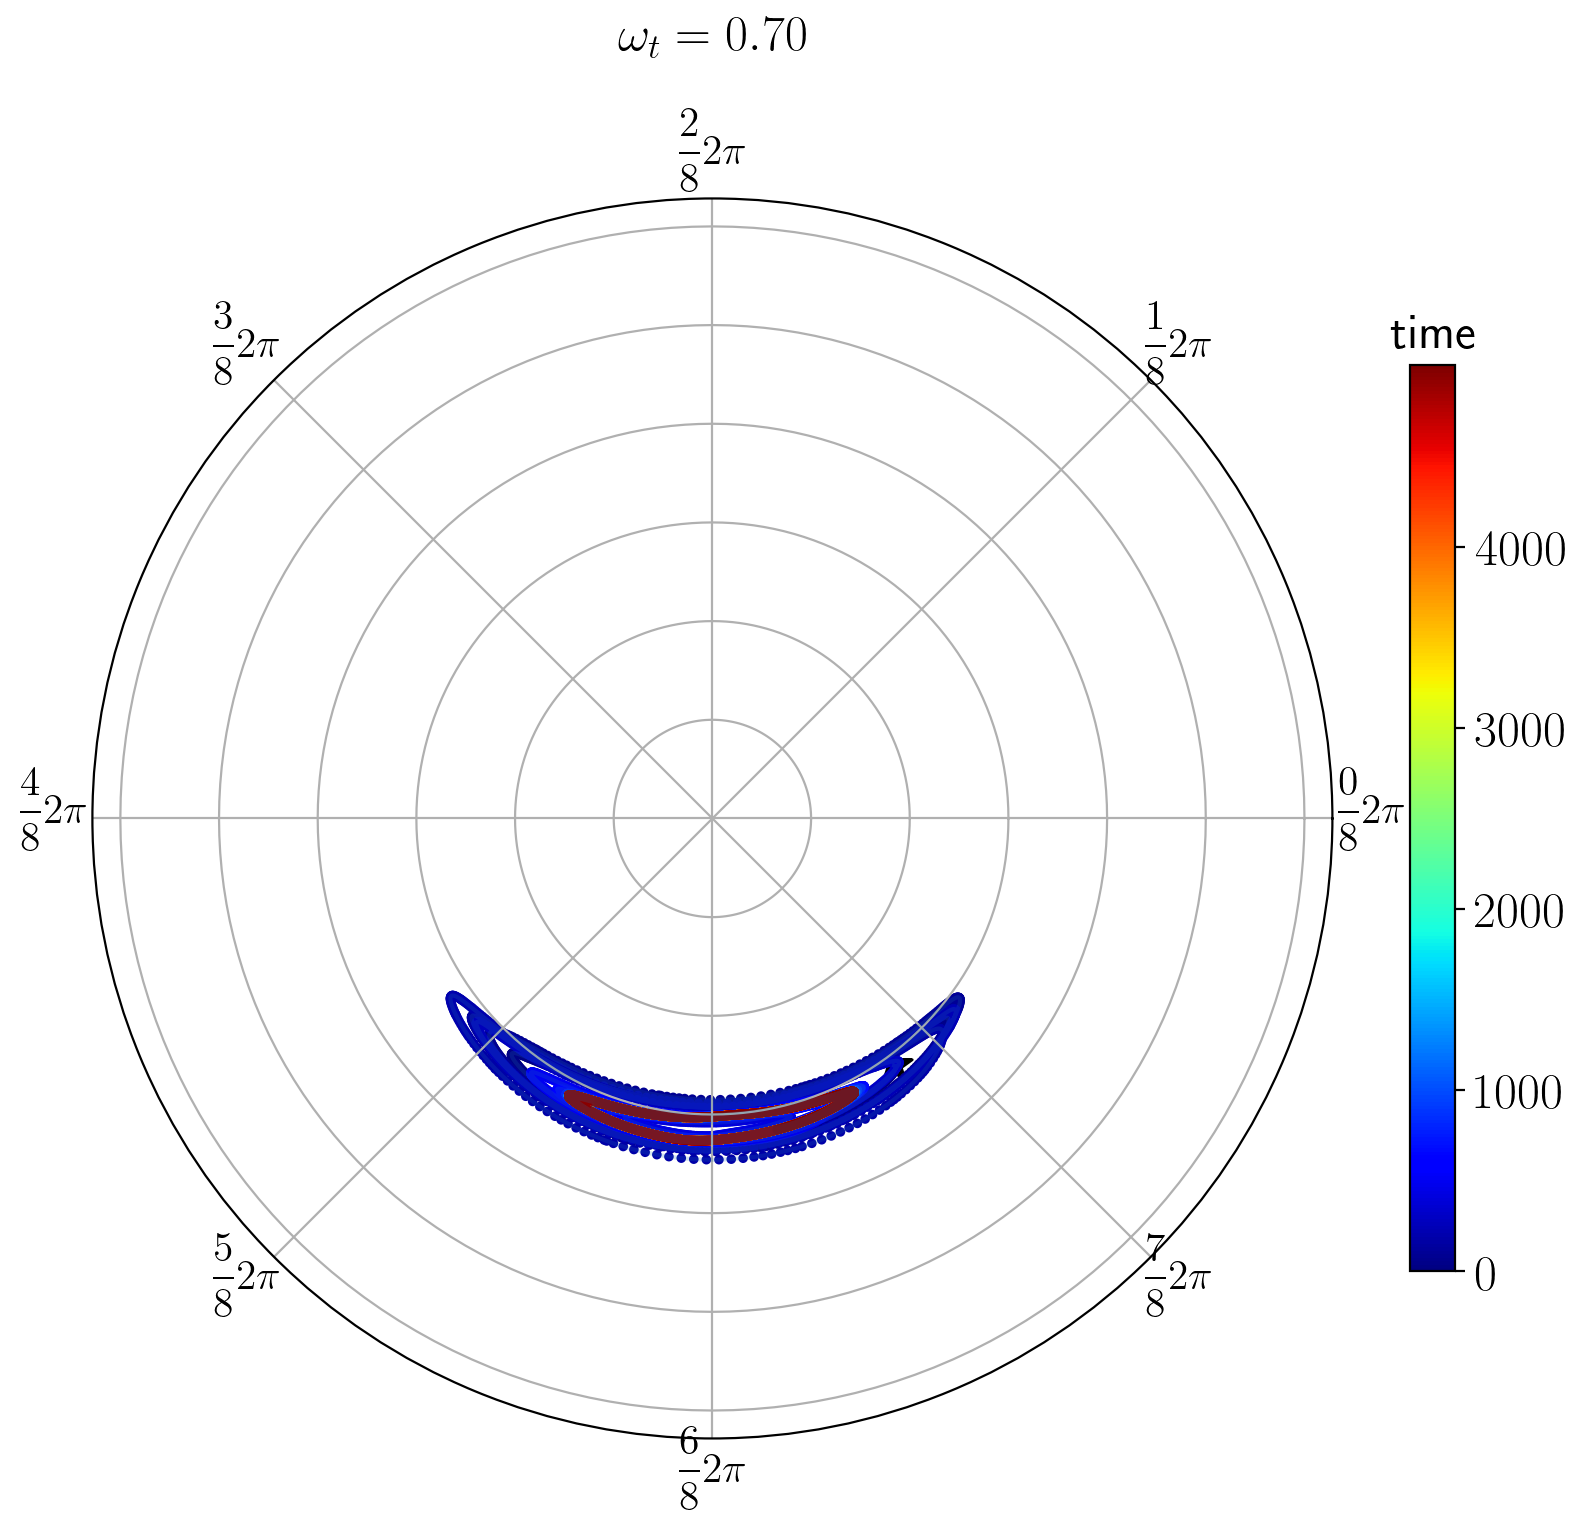

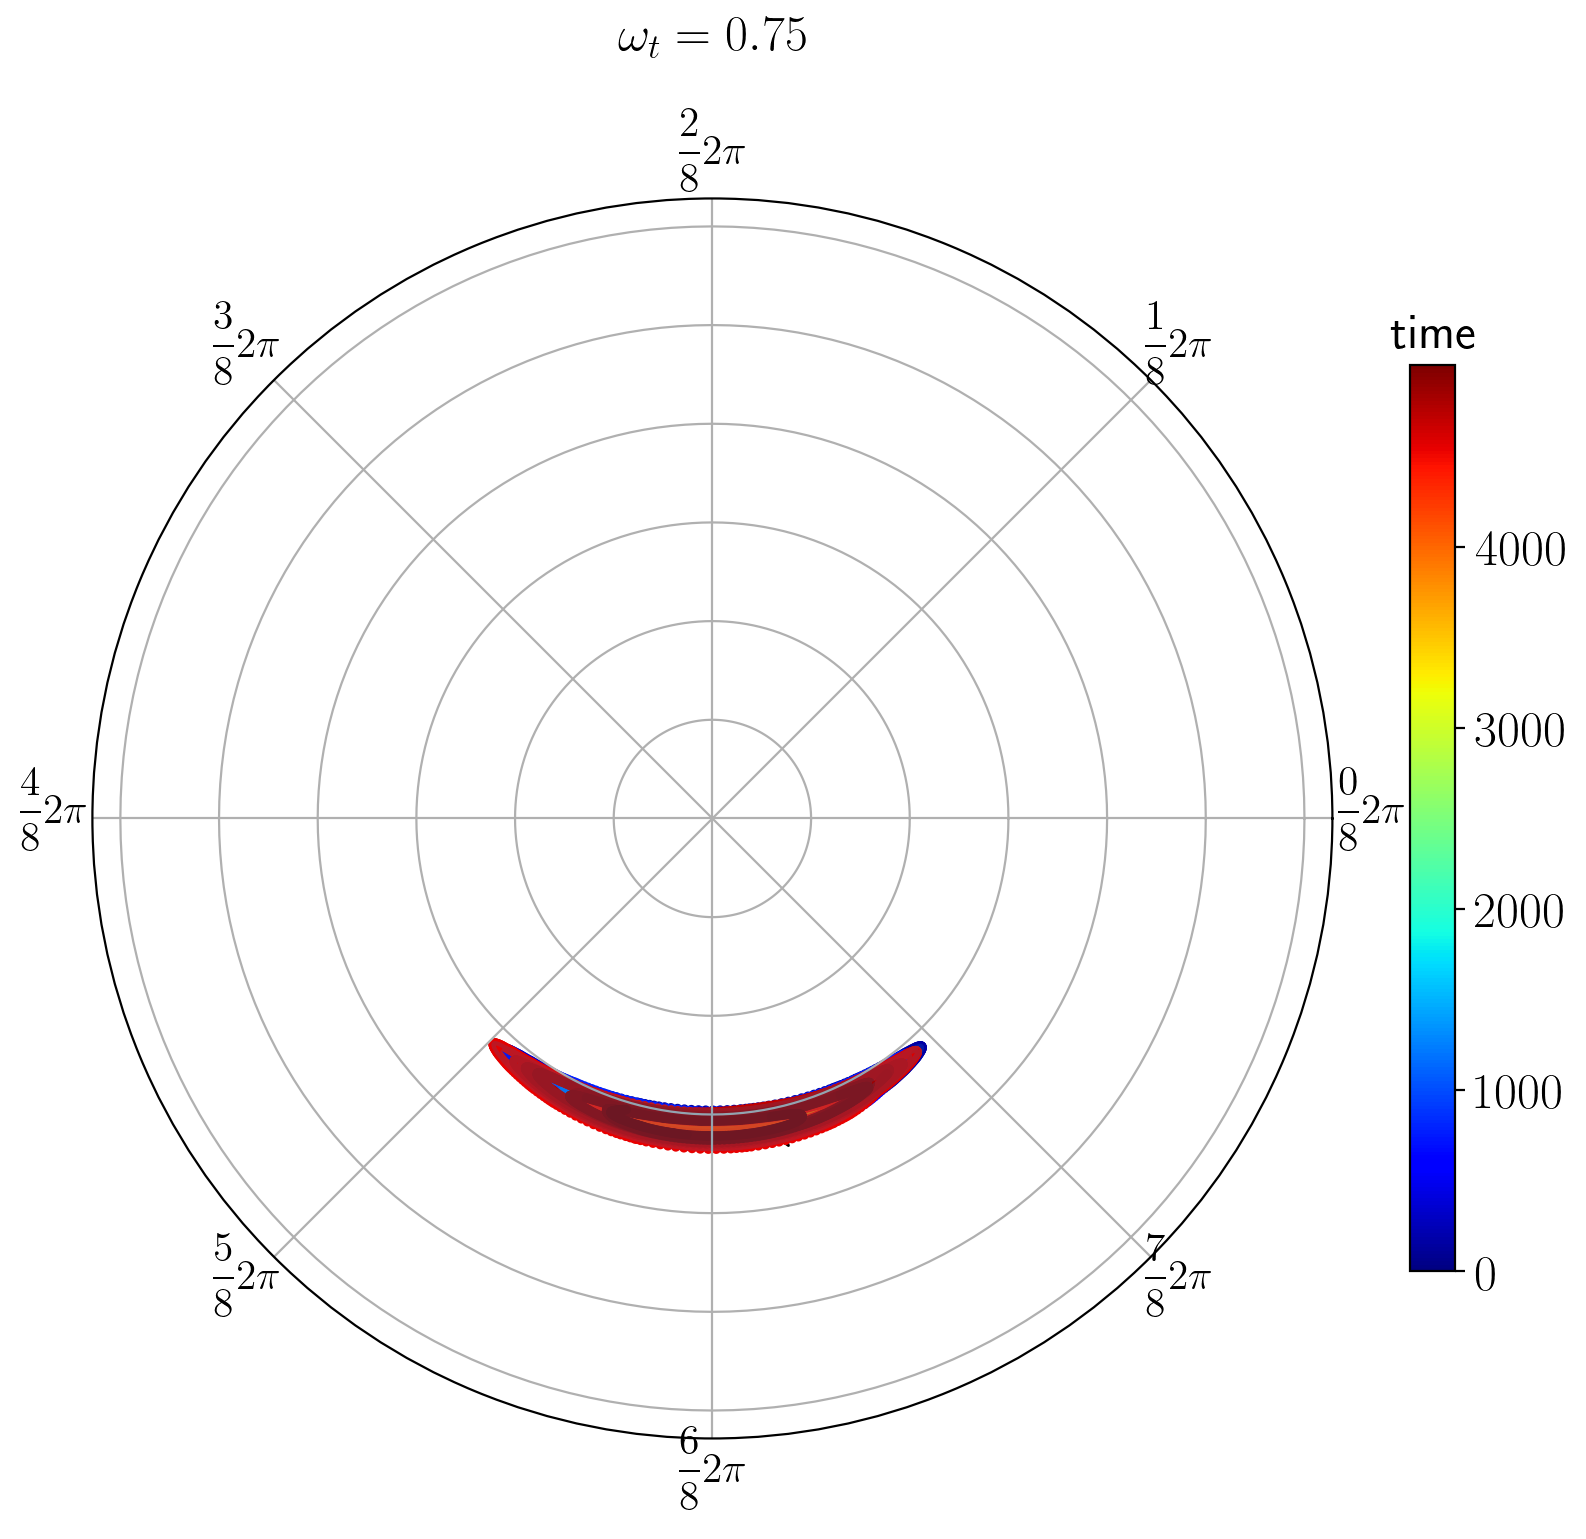

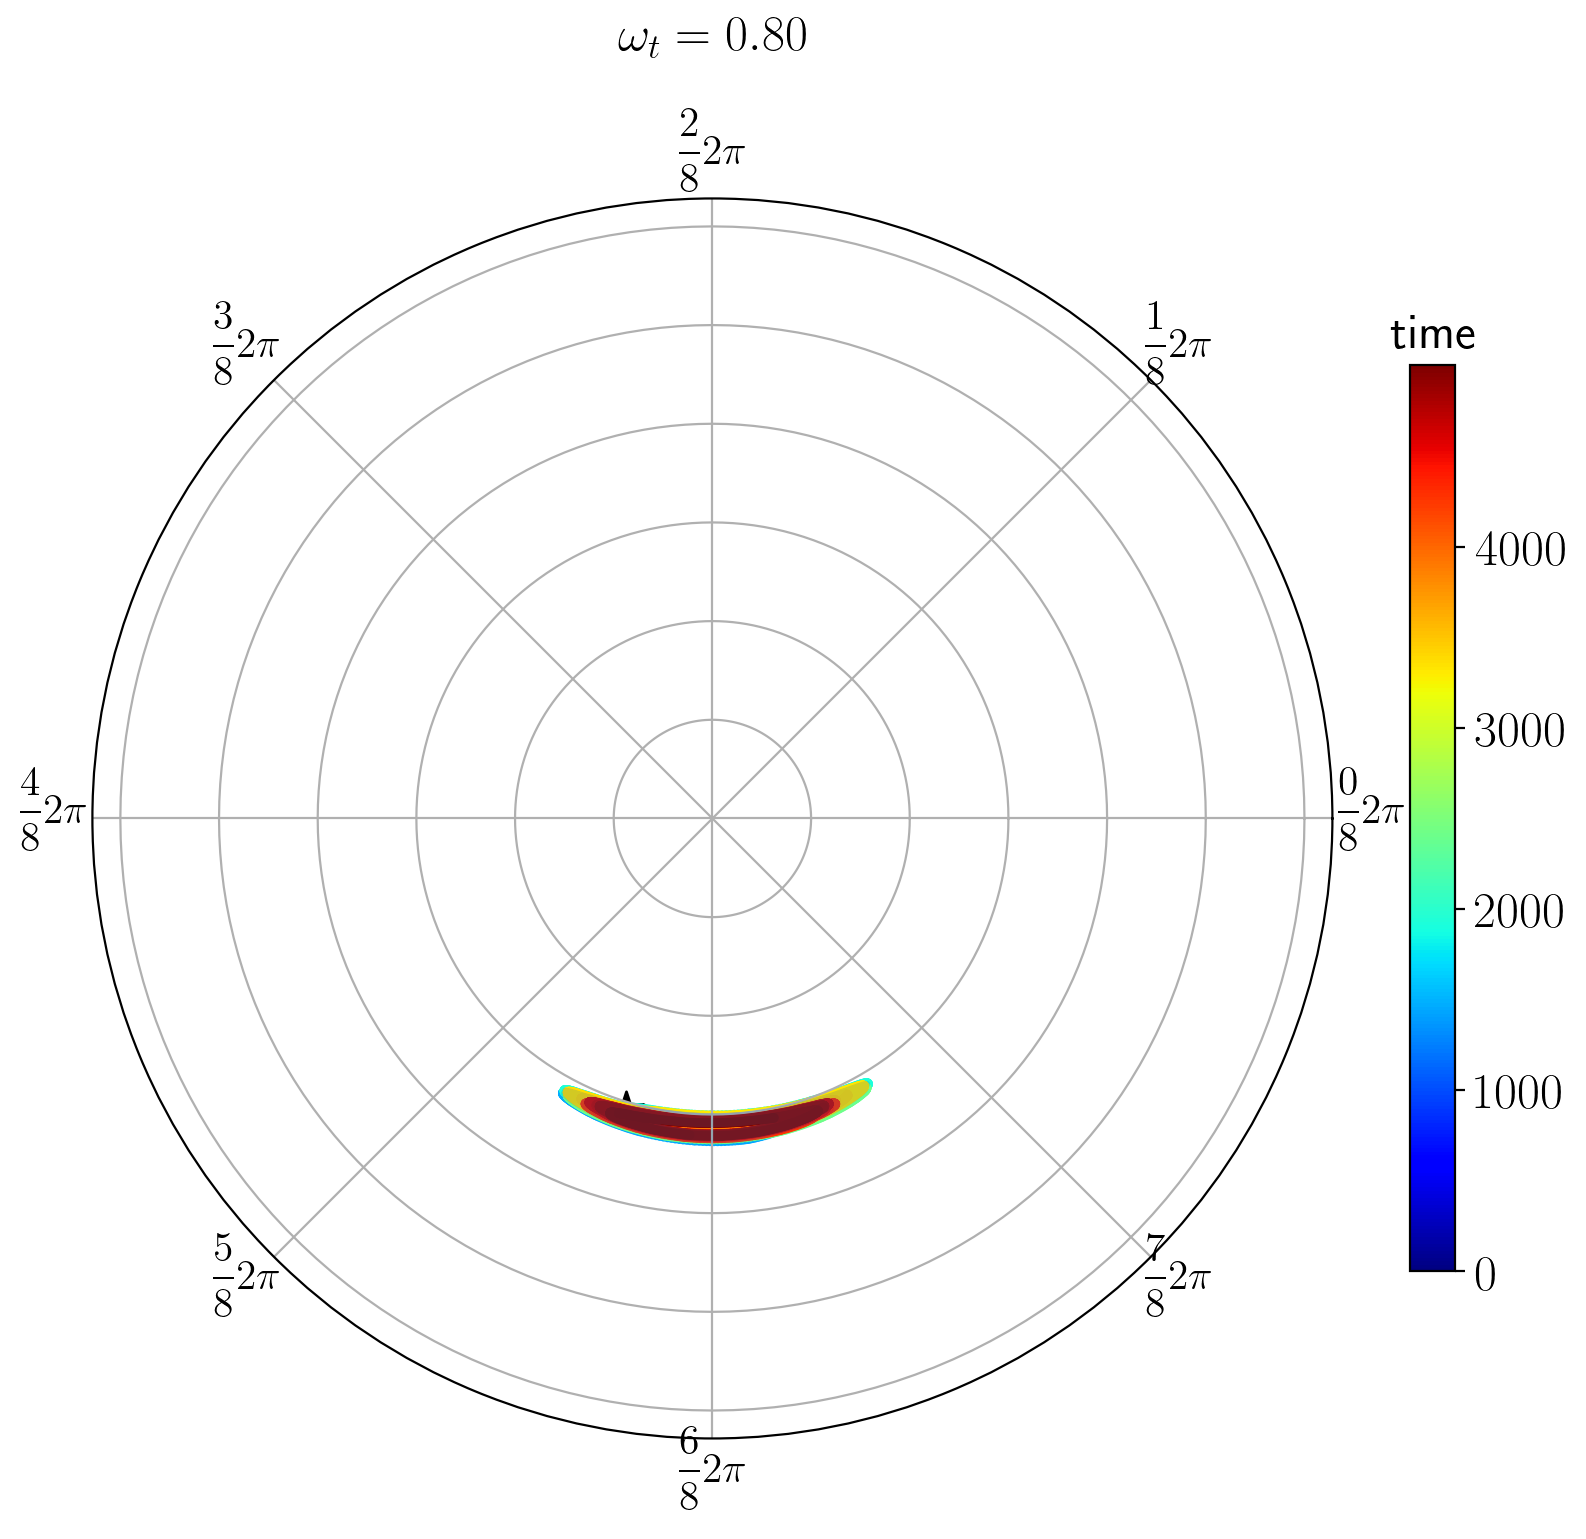

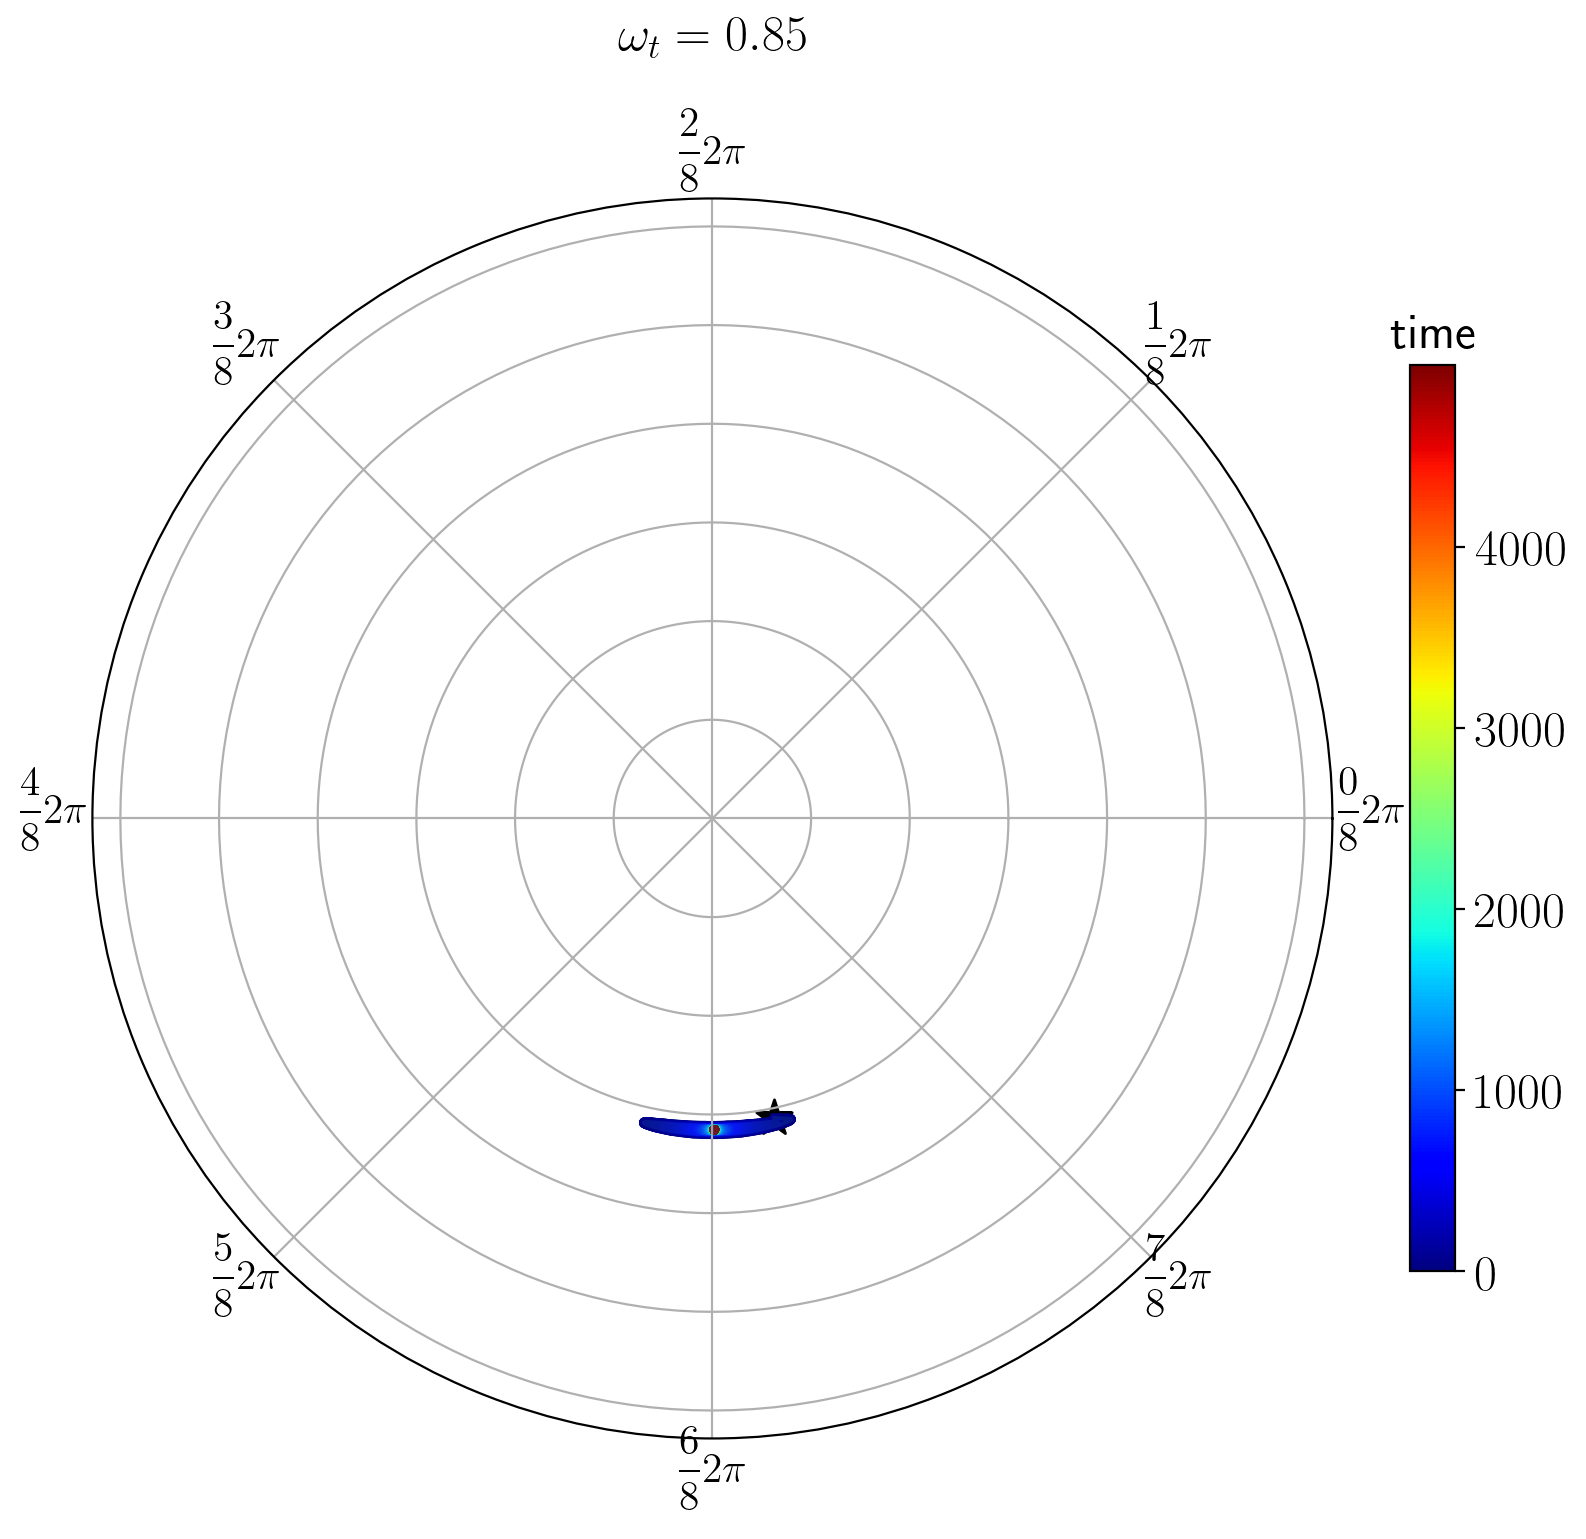

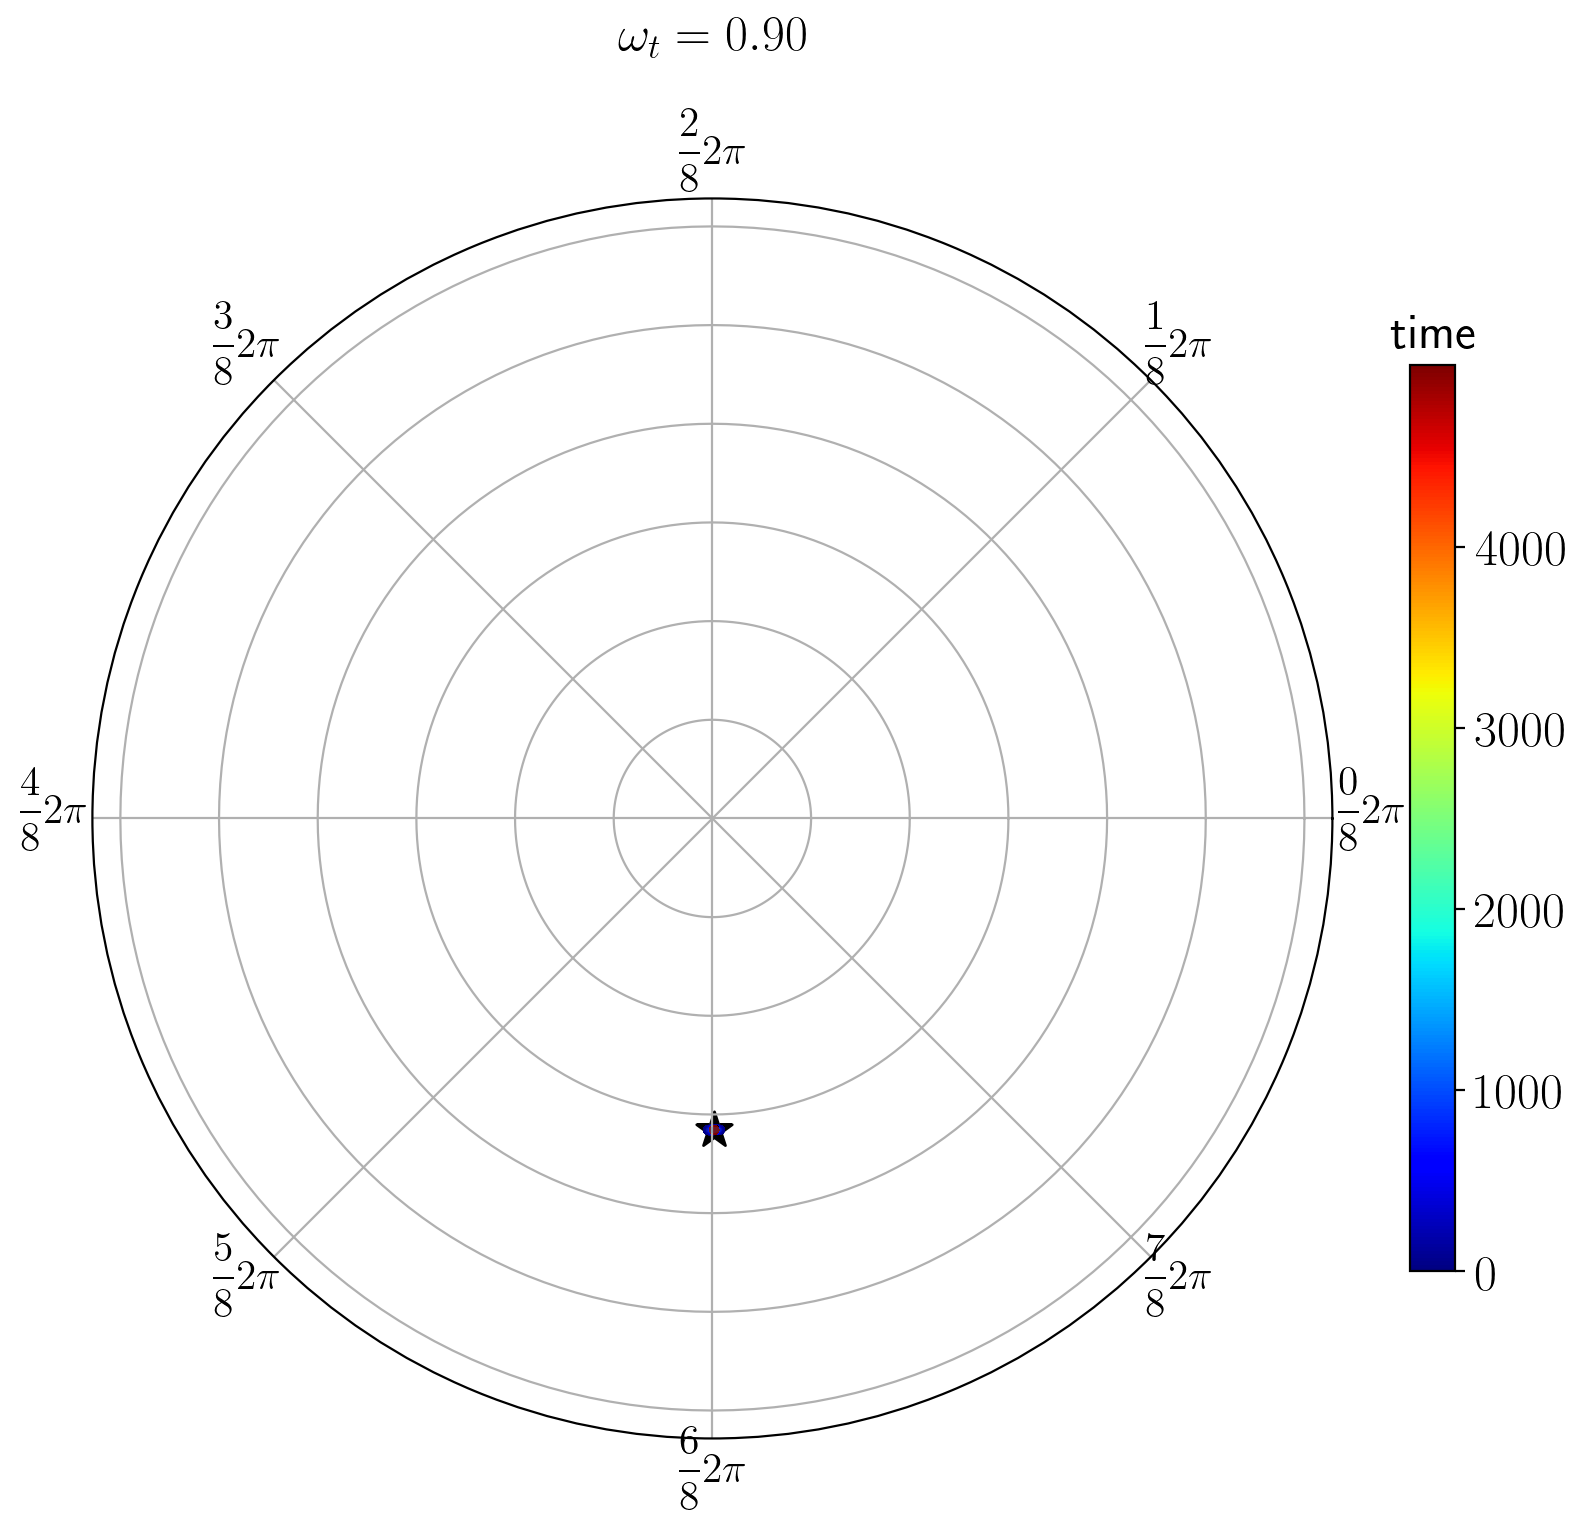

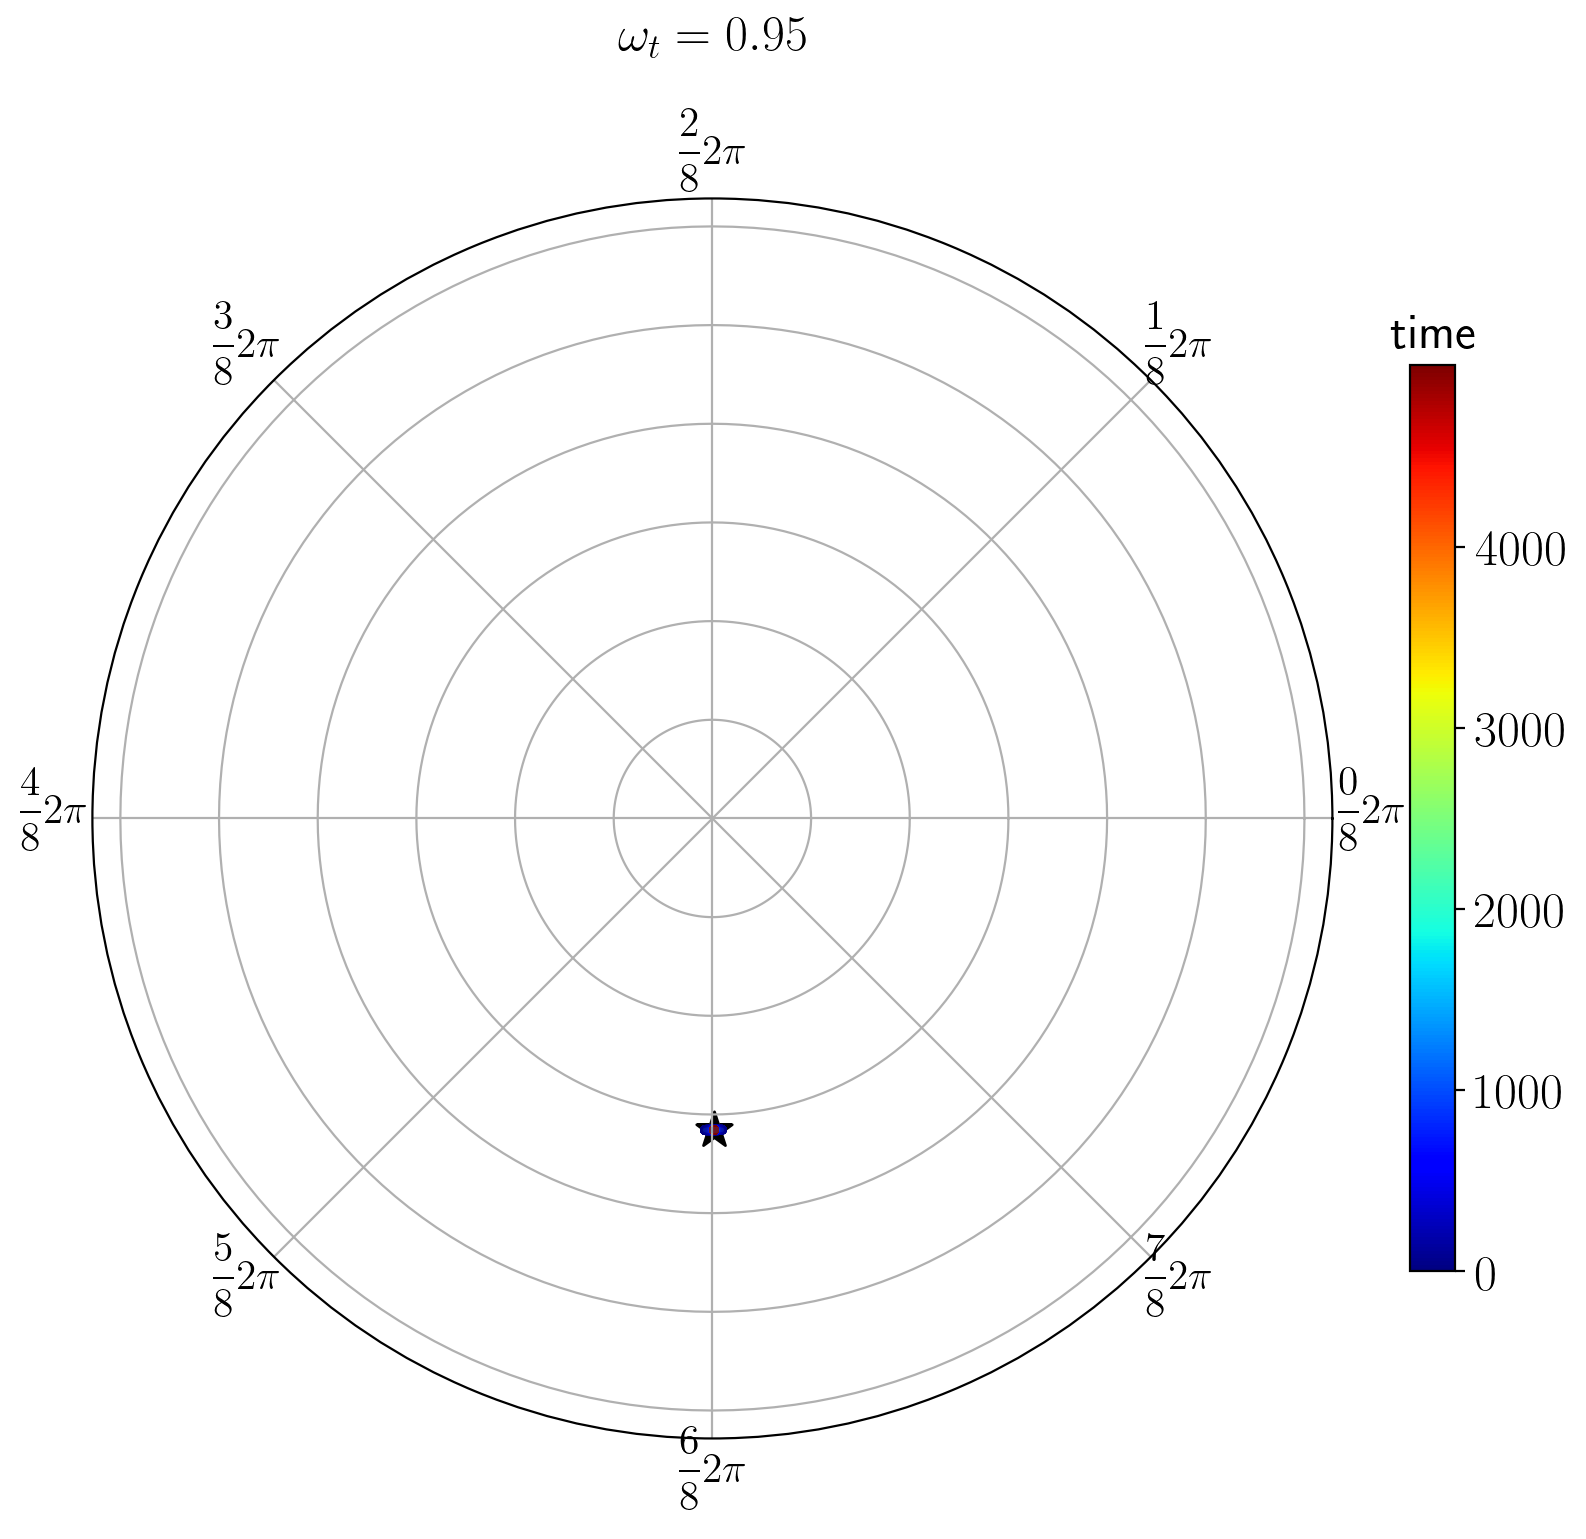

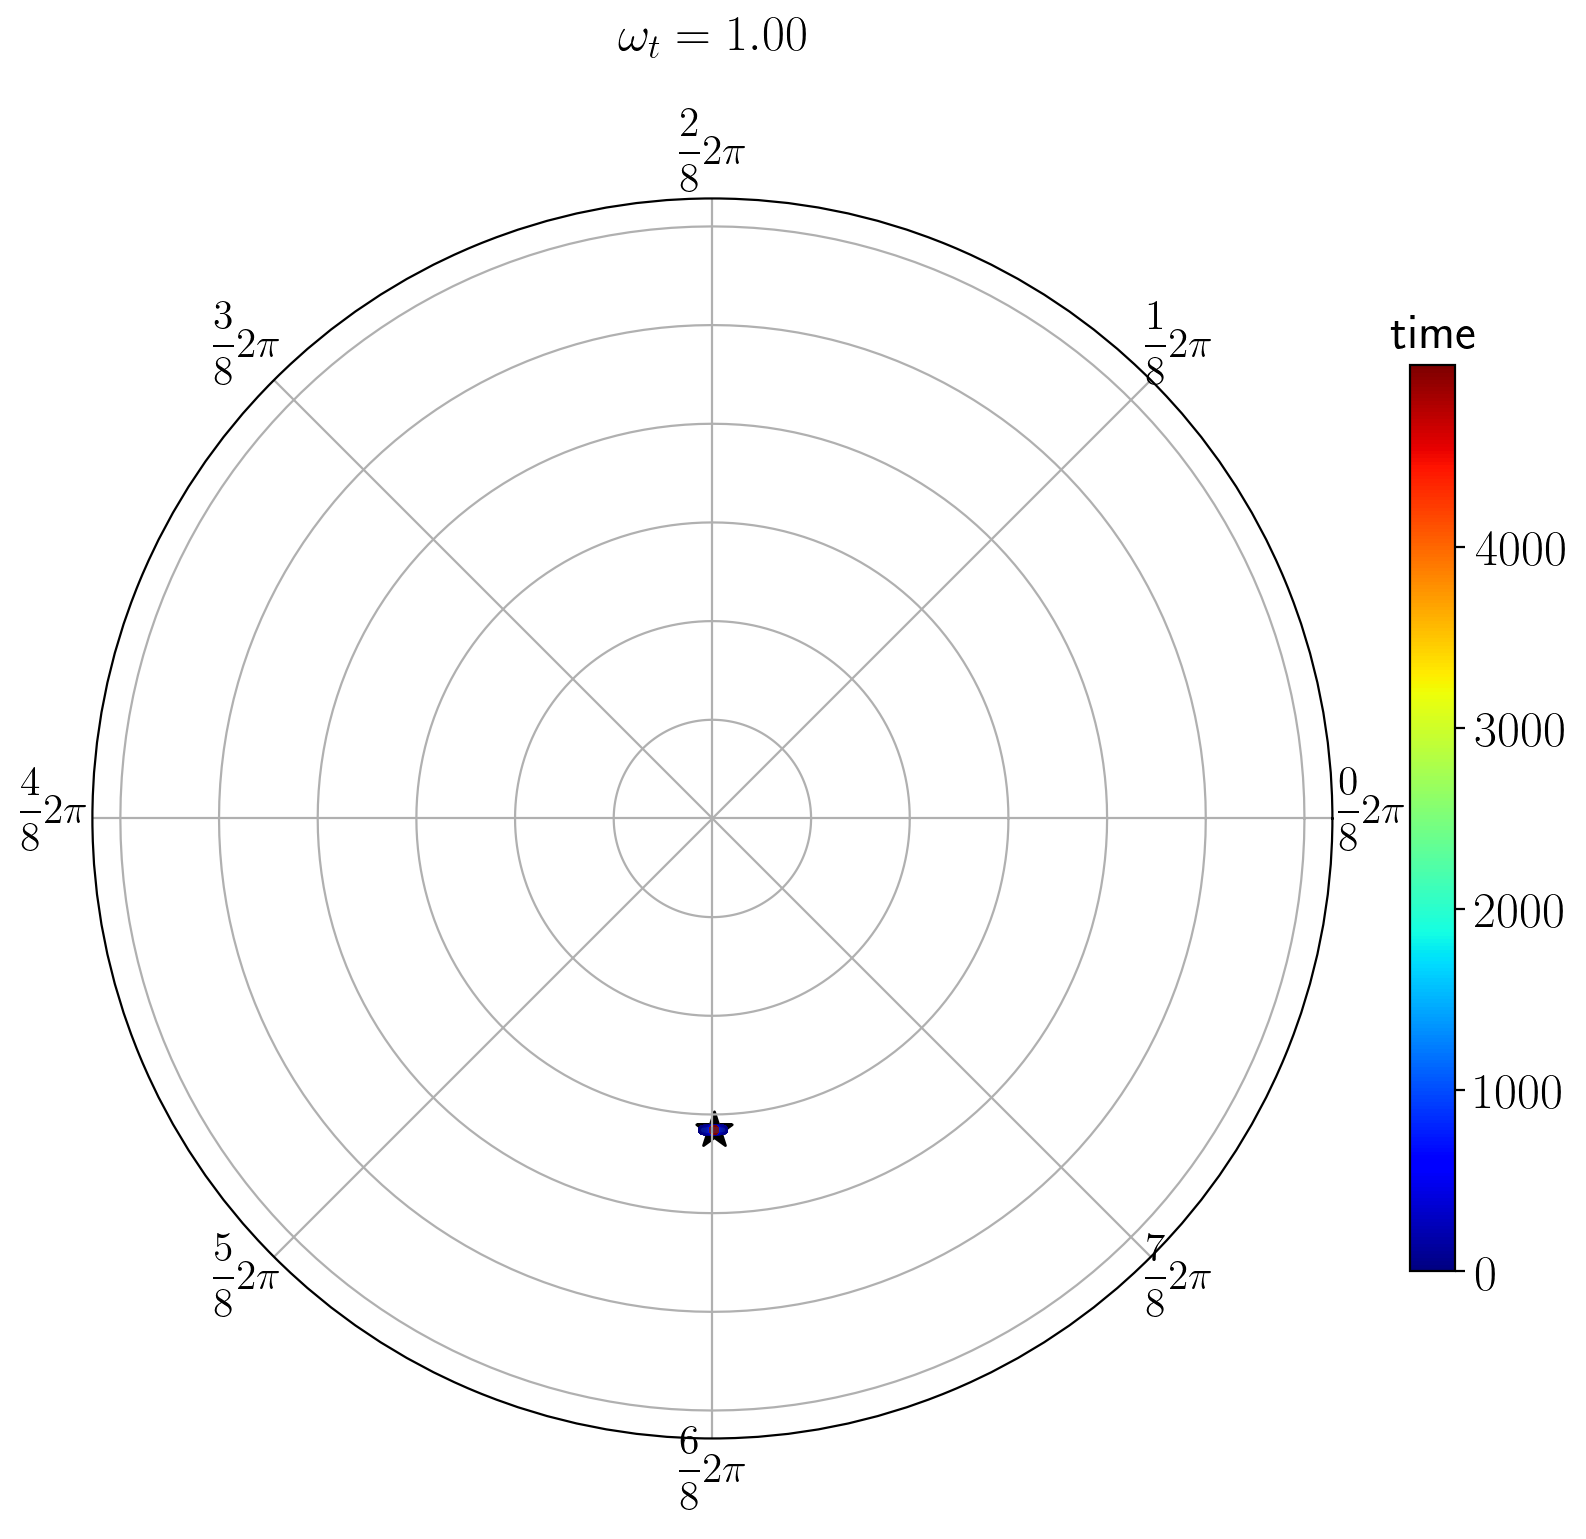

In [5]:
def get_major_fre(*args, **kwargs):
    return spf_tb.get_major_fre(*args, **kwargs)

def _do_once(t_theta, t_phi, t_psi, max_t, omega_tail, title=''):
    t0 = time()
    tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
    Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
       = spf_tb.do_ShearFlowPetsc4nPsiObj(tnorm, t_psi, max_t, update_fun=update_fun, 
                                          rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                          save_every=save_every, table_name=table_name2, 
                                          omega_tail=omega_tail, flow_strength=flow_strength)
    # fft rule
    tx = Table_t
    tmin = np.max((0, tx.max() - 1000))
    idx = tx > tmin
    freq_pk = get_major_fre(tx[idx], Table_theta[idx])
    idx = tx > (tx.max() - 1 / freq_pk * 10)
    mean_eta = np.mean(Table_eta[idx])
#     tpoly = np.polyfit(tx[idx], Table_X[idx, 0], 1, w=np.blackman(idx.sum()))
#     dx = tpoly[0]
    tpoly = np.polyfit(tx[idx], Table_X[idx, 1], 1, w=np.blackman(idx.sum()))
    dy = tpoly[0]
#     tpoly = np.polyfit(tx[idx], Table_X[idx, 2], 1, w=np.blackman(idx.sum()))
#     dz = tpoly[0]
    t1 = time()
    print('init \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (t_theta, t_phi, t_psi))
    print('last \\theta=%.3f, \\phi=%.3f, \\psi=%.3f, ' % (Table_theta[-1], Table_phi[-1], Table_psi[-1]))
    print('%s: run %d loops/times using %fs' % ('do_ShearFlowPetsc4nPsiObj', max_t, (t1 - t0)))
    print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
#     spf_tb.show_table_result_v2(Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, 
#                                 Table_phi, Table_psi, Table_eta, save_every=save_every)
    spf_tb.light_show_theta_phi(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                                Table_theta, Table_phi, Table_psi, Table_eta, title=title)
    return Table_t, Table_dt, Table_X, Table_P, Table_P2, \
           Table_theta, Table_phi, Table_psi, Table_eta, \
           mean_eta, dy

t0 = time()
# t_theta, t_phi, t_psi, pickle_handle = 1.142, 5.141, 0.000, 'C1'
# t_theta, t_phi, t_psi, pickle_handle = 1.142, 4.570, 0.000, 'C2'
# t_theta, t_phi, t_psi, pickle_handle = 1.142, 4.284, 0.000, 'C3'
t_theta, t_phi, t_psi, pickle_handle = 1.142, 4.284, 0.000, 'C3b'
# t_theta, t_phi, t_psi, pickle_handle = 0.000, 1.714, 0.000, 'C4'
# t_theta, t_phi, t_psi = np.random.sample(3) * np.pi * (1, 2, 2)
max_t0 = 10000
max_t = 5000
update_fun='5bs'
rtol=1e-9
atol=1e-12
eval_dt = 0.01
save_every = 1
omega_tail0 = 0
omega_tail_list = np.linspace(0, 1, 21)
flow_strength = 1
table_name2 = 'ecoC01B05_baseFlow'

thphps_list = []

# ini process
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, mean_eta, dy \
    = _do_once(t_theta, t_phi, t_psi, max_t0, omega_tail0)
t_theta, t_phi, t_psi = Table_theta[-1], Table_phi[-1], Table_psi[-1]

mean_eta_list = []
dy_list = []
# increase omega_t
for omega_tail in omega_tail_list:
    title = '$\\omega_t = %.2f$' % omega_tail
    Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, mean_eta, dy \
        = _do_once(t_theta, t_phi, t_psi, max_t, omega_tail, title)
    mean_eta_list.append(mean_eta)
    dy_list.append(dy)
    t_theta, t_phi, t_psi = Table_theta[-1], Table_phi[-1], Table_psi[-1]

pickle_name = '%s_jmp.pickle' % pickle_handle
tpk = (omega_tail_list, mean_eta_list, dy_list)
with open(pickle_name, 'wb') as handle:
    pickle.dump(tpk, handle, protocol=pickle.HIGHEST_PROTOCOL)


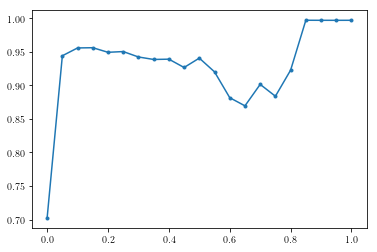

In [6]:
# omega_tail_list, mean_eta_list, dy_list
plt.plot(np.hstack(omega_tail_list), np.hstack(mean_eta_list) / np.pi, '.-')
# plt.plot(np.hstack(omega_tail_list), np.hstack(dy_list), '.-')

In [24]:
np.linspace(0, 1, 21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

True

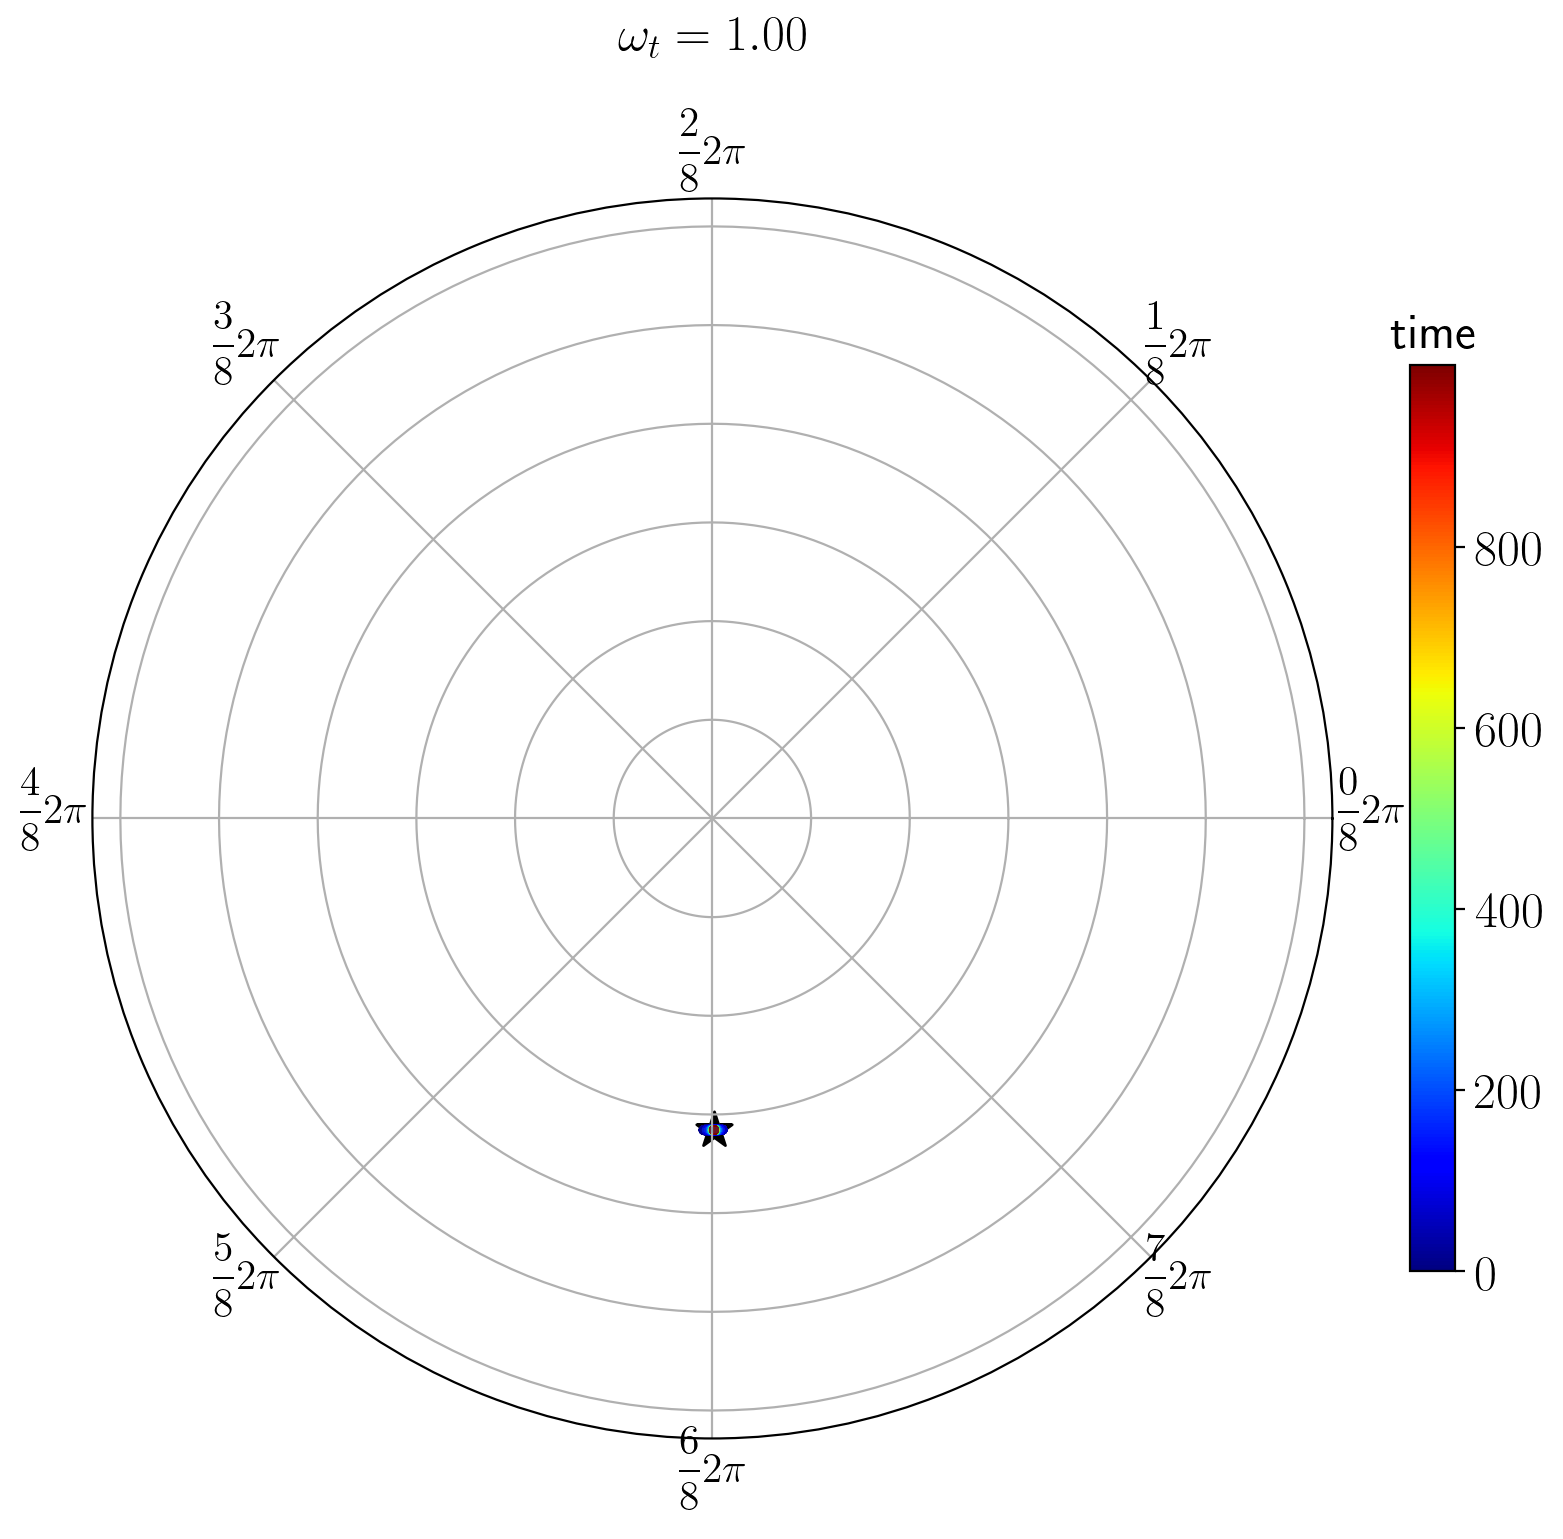

In [15]:
# Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
#     = _do_once(t_theta, t_phi, t_psi, max_t, omega_tail, title)
spf_tb.light_show_theta_phi(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                            Table_theta, Table_phi, Table_psi, Table_eta, title=title)

In [7]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])